In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("porter.csv")

## Dataset Description
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

In [90]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [91]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

## Data Cleaning

In [92]:
df.duplicated().nunique()

1

In [93]:
#year,month and day for 'created_at'
df['year']=df['created_at'].str.split('-',expand=True)[0].astype(str).astype(int)
df['month']=df['created_at'].str.split('-',expand=True)[1].astype(str).astype(int)
df['day']=df['created_at'].str.split('-',expand=True)[2]
df['day']=df['day'].str.split(' ',expand=True)[0].astype(str).astype(int)

In [94]:
len(df)

197428

In [95]:
#converting created_at and actual_delivery_time into date_time format
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [96]:
#creating a new feature'time_taken(mins)' to store the time taken for delivery in minutes
a=[None for _ in range(len(df))]
for i in range(len(df)):
    a[i]=pd.Timedelta(df['actual_delivery_time'].iloc[i]-df['created_at'].iloc[i]).seconds/60
df['time_taken(mins)']=a

In [97]:
#dropping created_at and actual_deivery_time because more or less we have dealt with both of them
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

In [98]:
df.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'year', 'month', 'day', 'time_taken(mins)'],
      dtype='object')

In [99]:
(df.isnull().sum()/len(df))*100

market_id                   0.499929
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
year                        0.000000
month                       0.000000
day                         0.000000
time_taken(mins)            0.003546
dtype: float64

In [100]:
df.dropna(subset=['store_primary_category','time_taken(mins)','market_id','order_protocol'], inplace=True)

In [101]:
df.isnull().sum()

market_id                       0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      15673
total_busy_partners         15673
total_outstanding_orders    15673
year                            0
month                           0
day                             0
time_taken(mins)                0
dtype: int64

In [102]:
mean_values = df[['total_onshift_partners','total_busy_partners','total_outstanding_orders' ]].mean()

In [103]:
df_1 = df.fillna(mean_values)
df_1.isnull().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
year                        0
month                       0
day                         0
time_taken(mins)            0
dtype: int64

In [104]:
df = df_1

In [105]:
df.duplicated()

0         False
1         False
8         False
14        False
15        False
          ...  
197423    False
197424    False
197425    False
197426    False
197427    False
Length: 191921, dtype: bool

## EDA

In [106]:
df.nunique()

market_id                      6
store_id                    6567
store_primary_category        74
order_protocol                 7
total_items                   57
subtotal                    8319
num_distinct_items            20
min_item_price              2297
max_item_price              2632
total_onshift_partners       173
total_busy_partners          159
total_outstanding_orders     282
year                           2
month                          3
day                           30
time_taken(mins)            7089
dtype: int64

In [107]:
features = []

In [108]:
#splitting features into categorical and numerical
categorical_feature=['market_id','store_id','store_primary_category','order_protocol','year','month']
numerical_feature=['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders','day','time_taken(mins)']

<AxesSubplot:xlabel='market_id', ylabel='time_taken(mins)'>

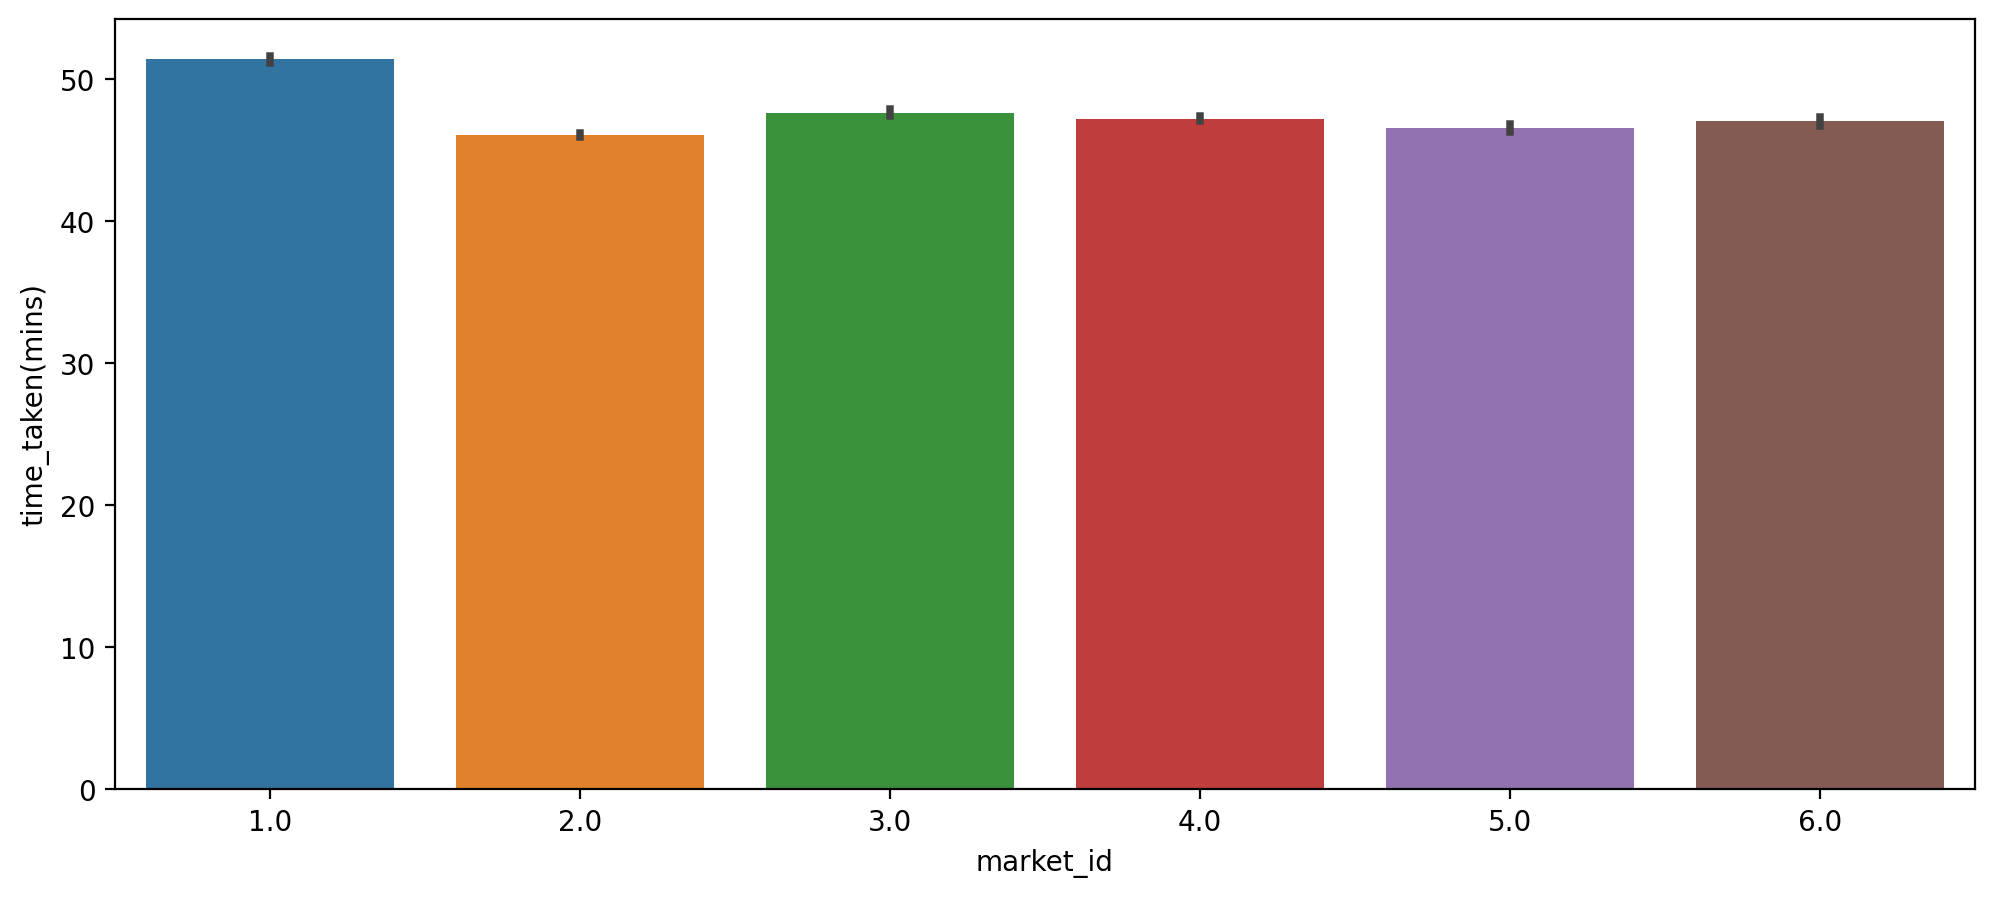

In [109]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.barplot(x='market_id', y='time_taken(mins)', data = df)

In [110]:
features.append('market_id')

In [111]:
df.store_id.nunique()

6567

<AxesSubplot:xlabel='store_primary_category', ylabel='time_taken(mins)'>

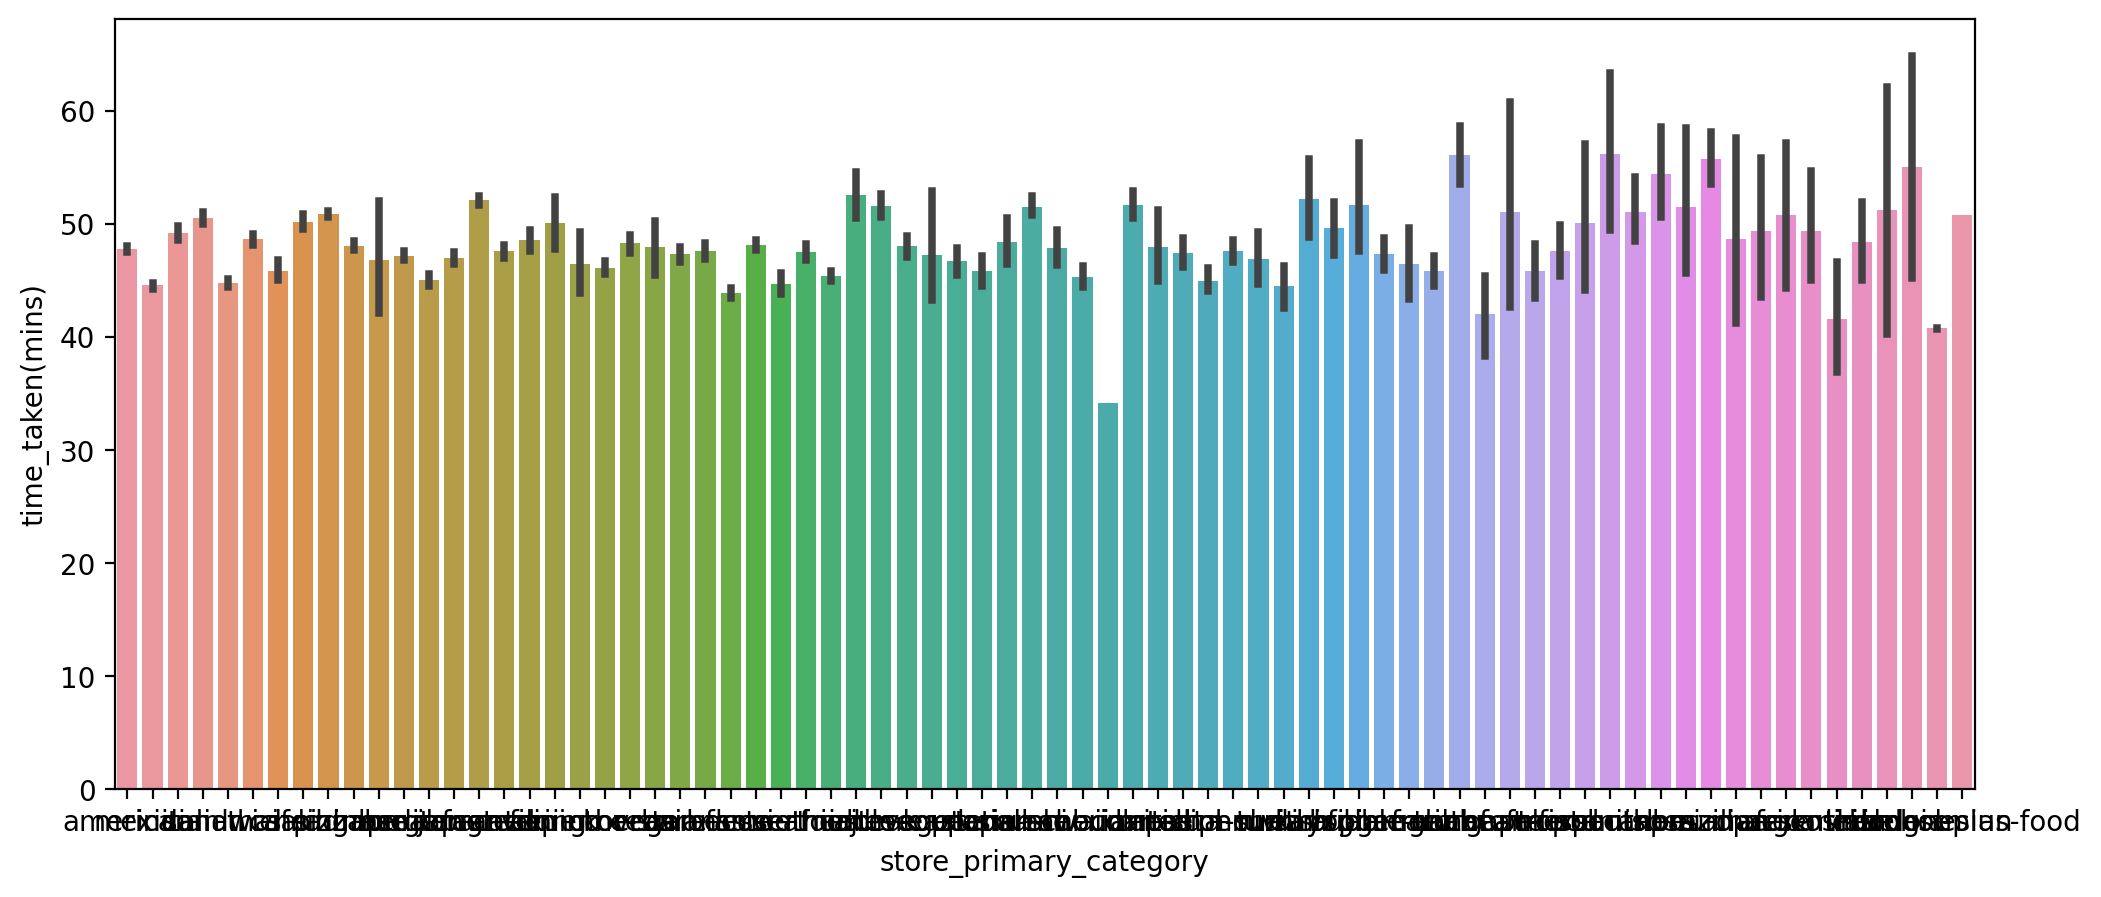

In [112]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.barplot(x='store_primary_category', y='time_taken(mins)', data = df)

In [113]:
features.append('store_primary_category')

<AxesSubplot:xlabel='order_protocol', ylabel='time_taken(mins)'>

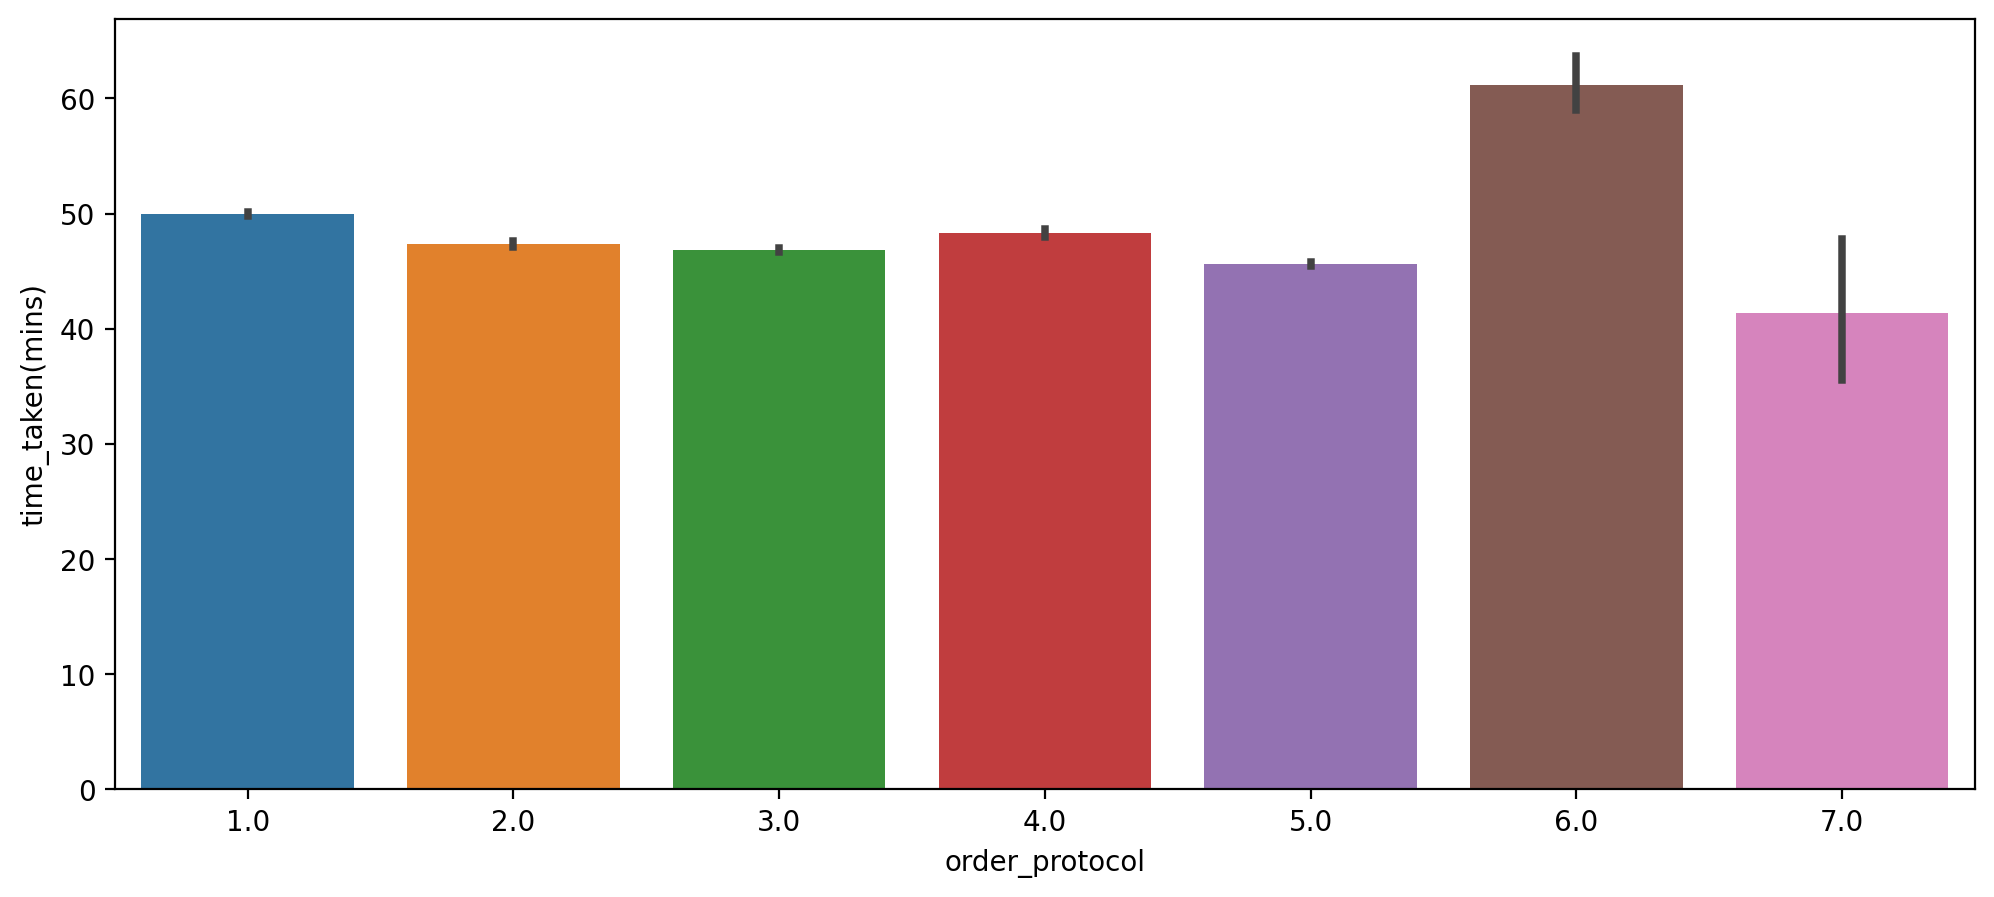

In [114]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.barplot(x='order_protocol', y='time_taken(mins)', data = df)

In [115]:
features.append('order_protocol')

<AxesSubplot:xlabel='year', ylabel='time_taken(mins)'>

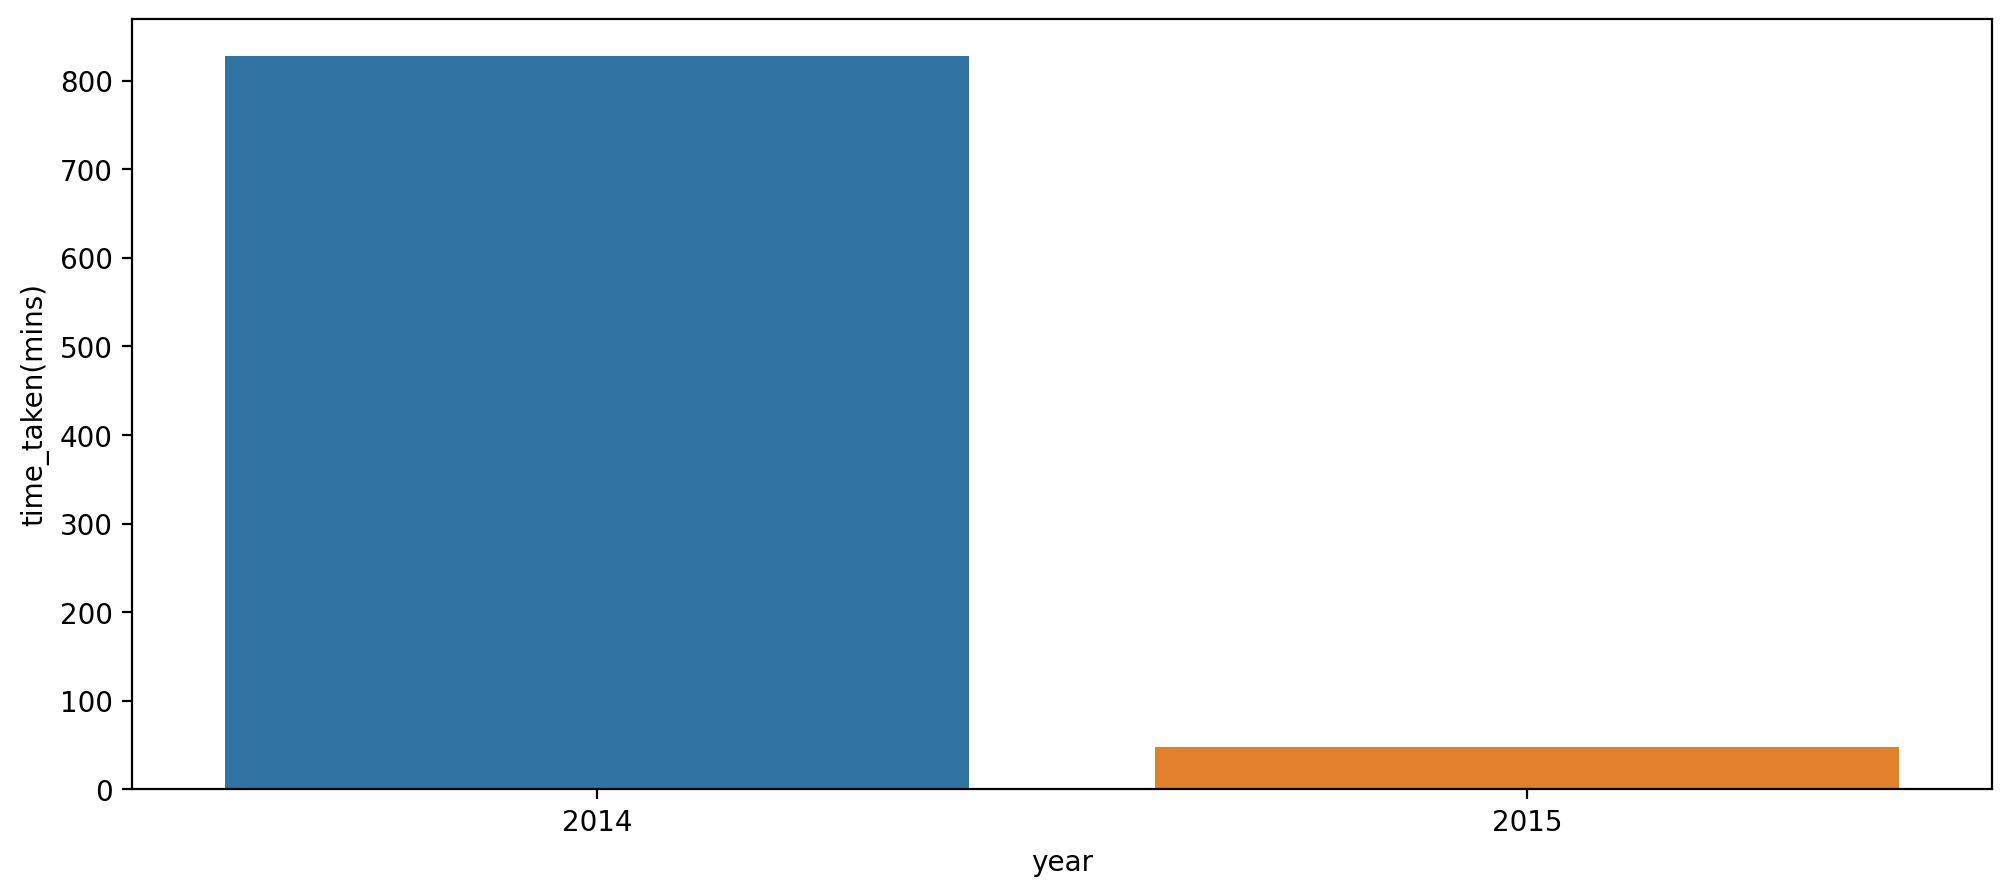

In [116]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.barplot(x='year', y='time_taken(mins)', data = df)

<AxesSubplot:xlabel='year', ylabel='time_taken(mins)'>

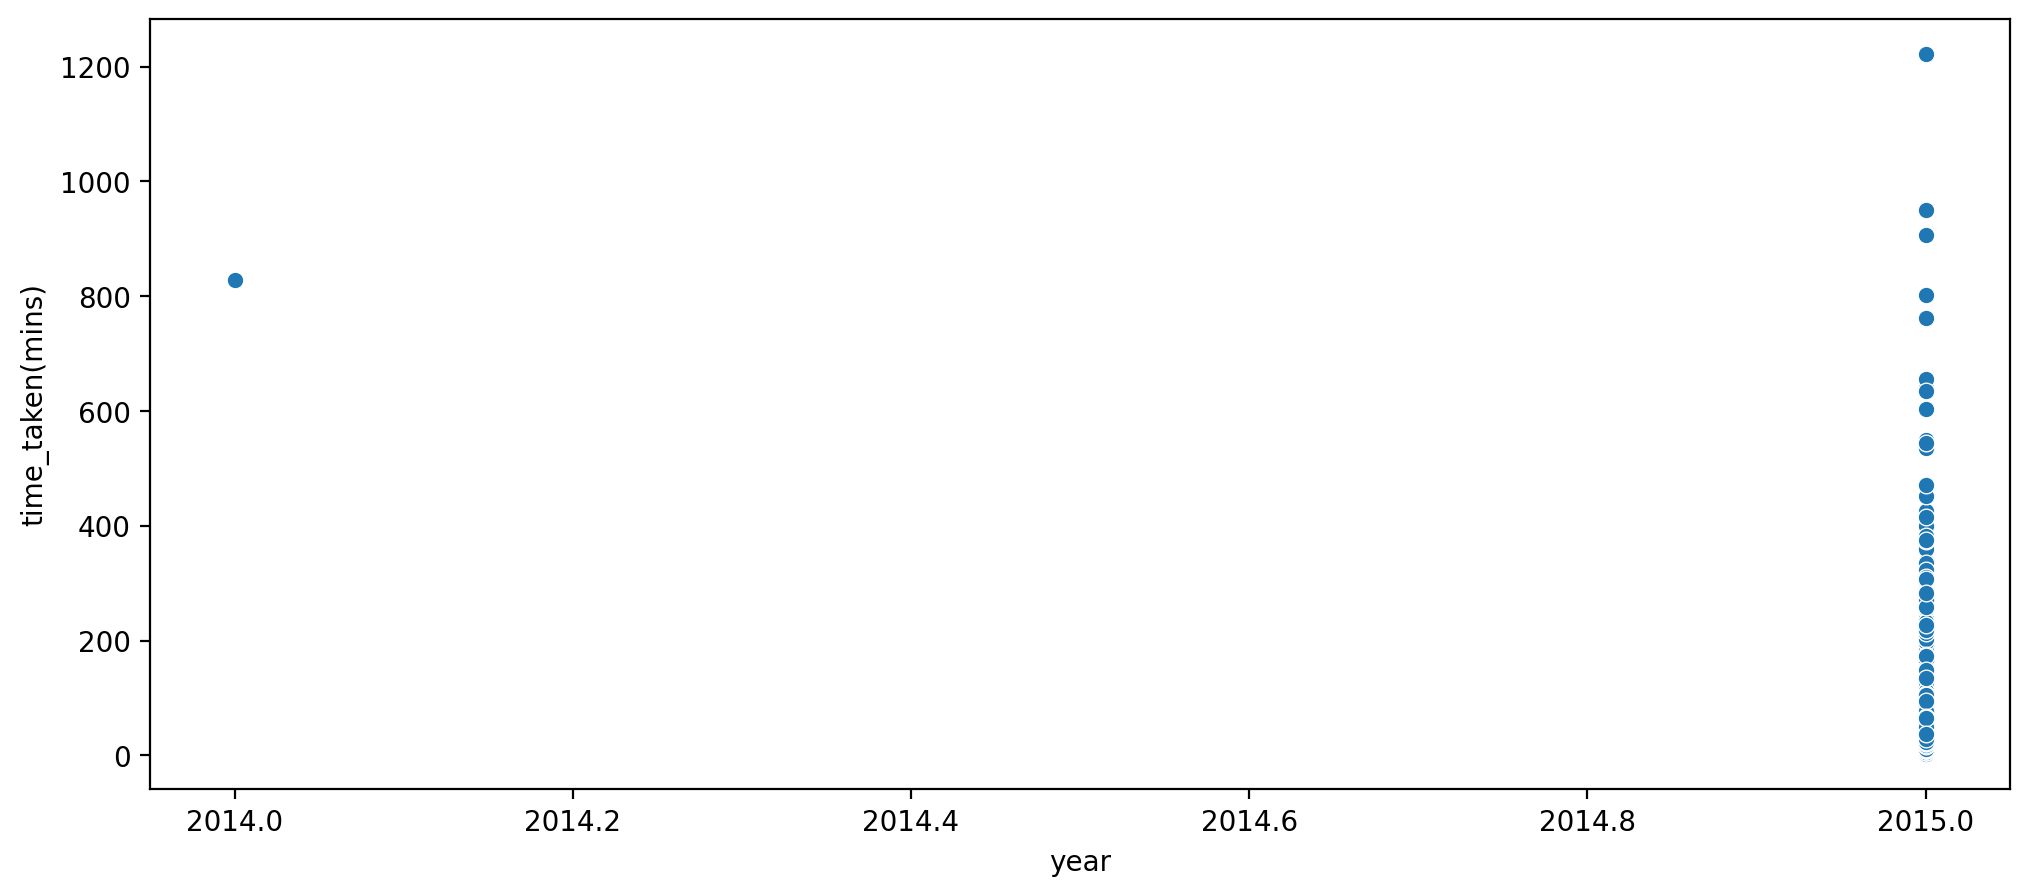

In [117]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='year', y='time_taken(mins)', data = df)

<AxesSubplot:xlabel='month', ylabel='time_taken(mins)'>

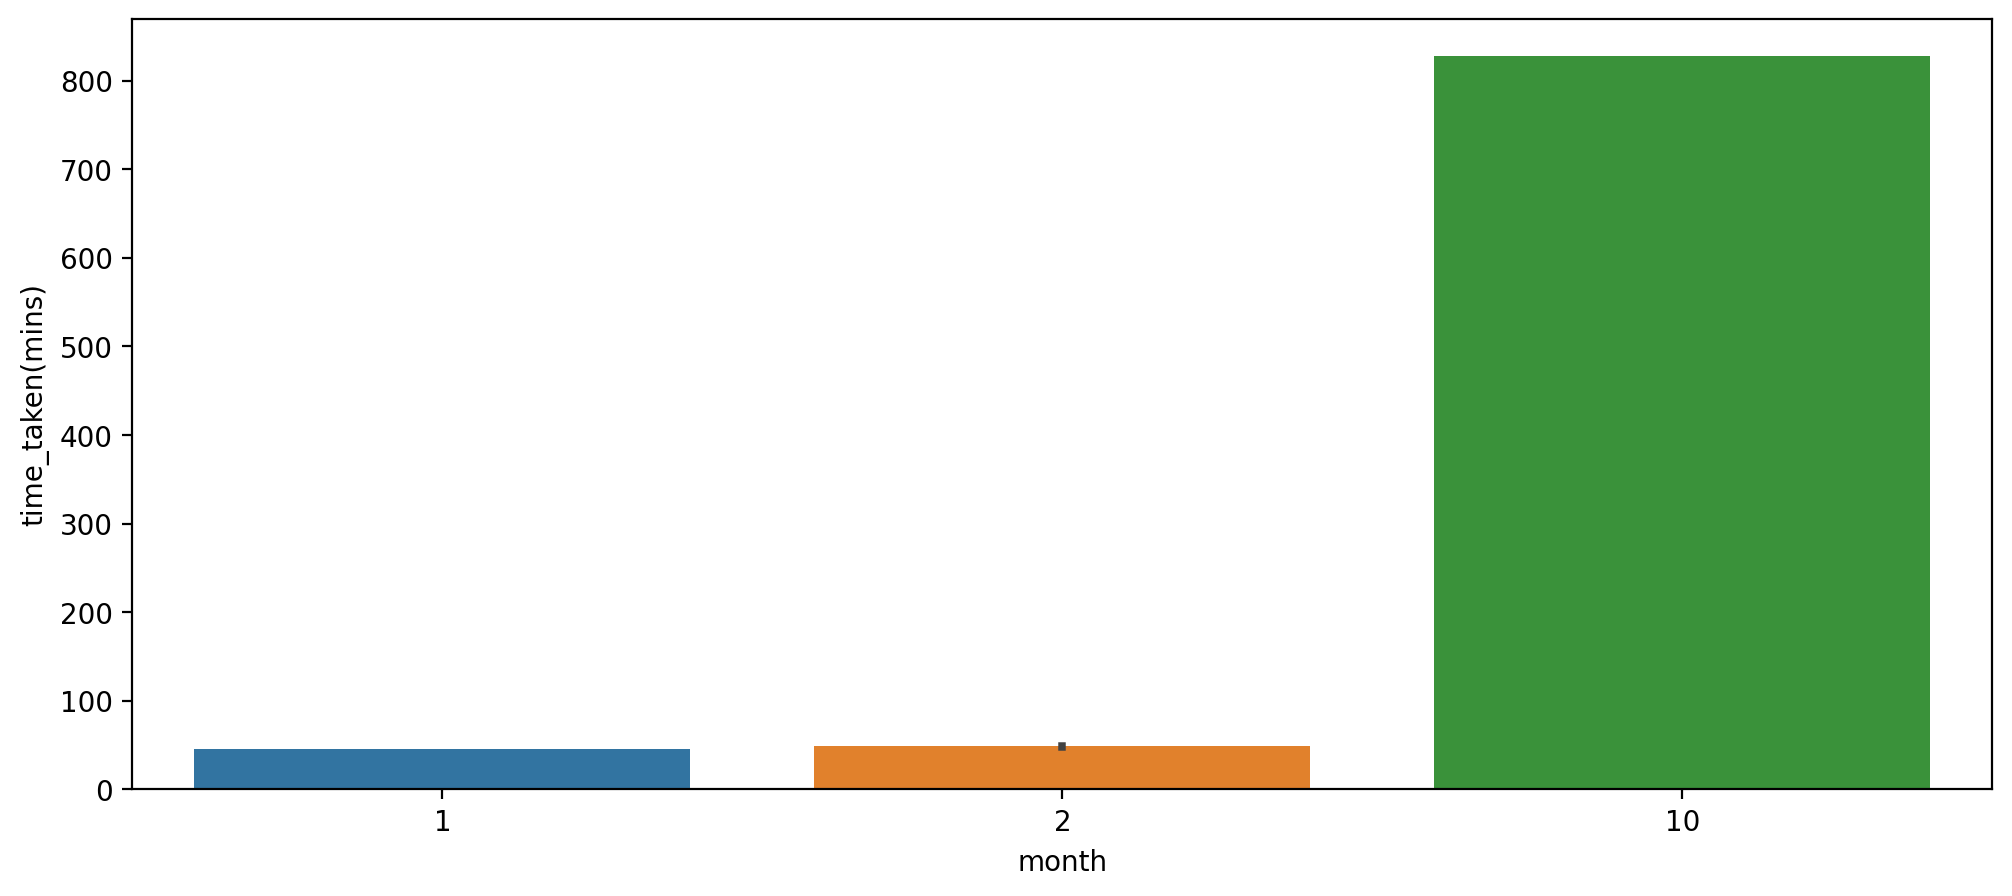

In [118]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.barplot(x='month', y='time_taken(mins)', data = df)

<AxesSubplot:xlabel='month', ylabel='time_taken(mins)'>

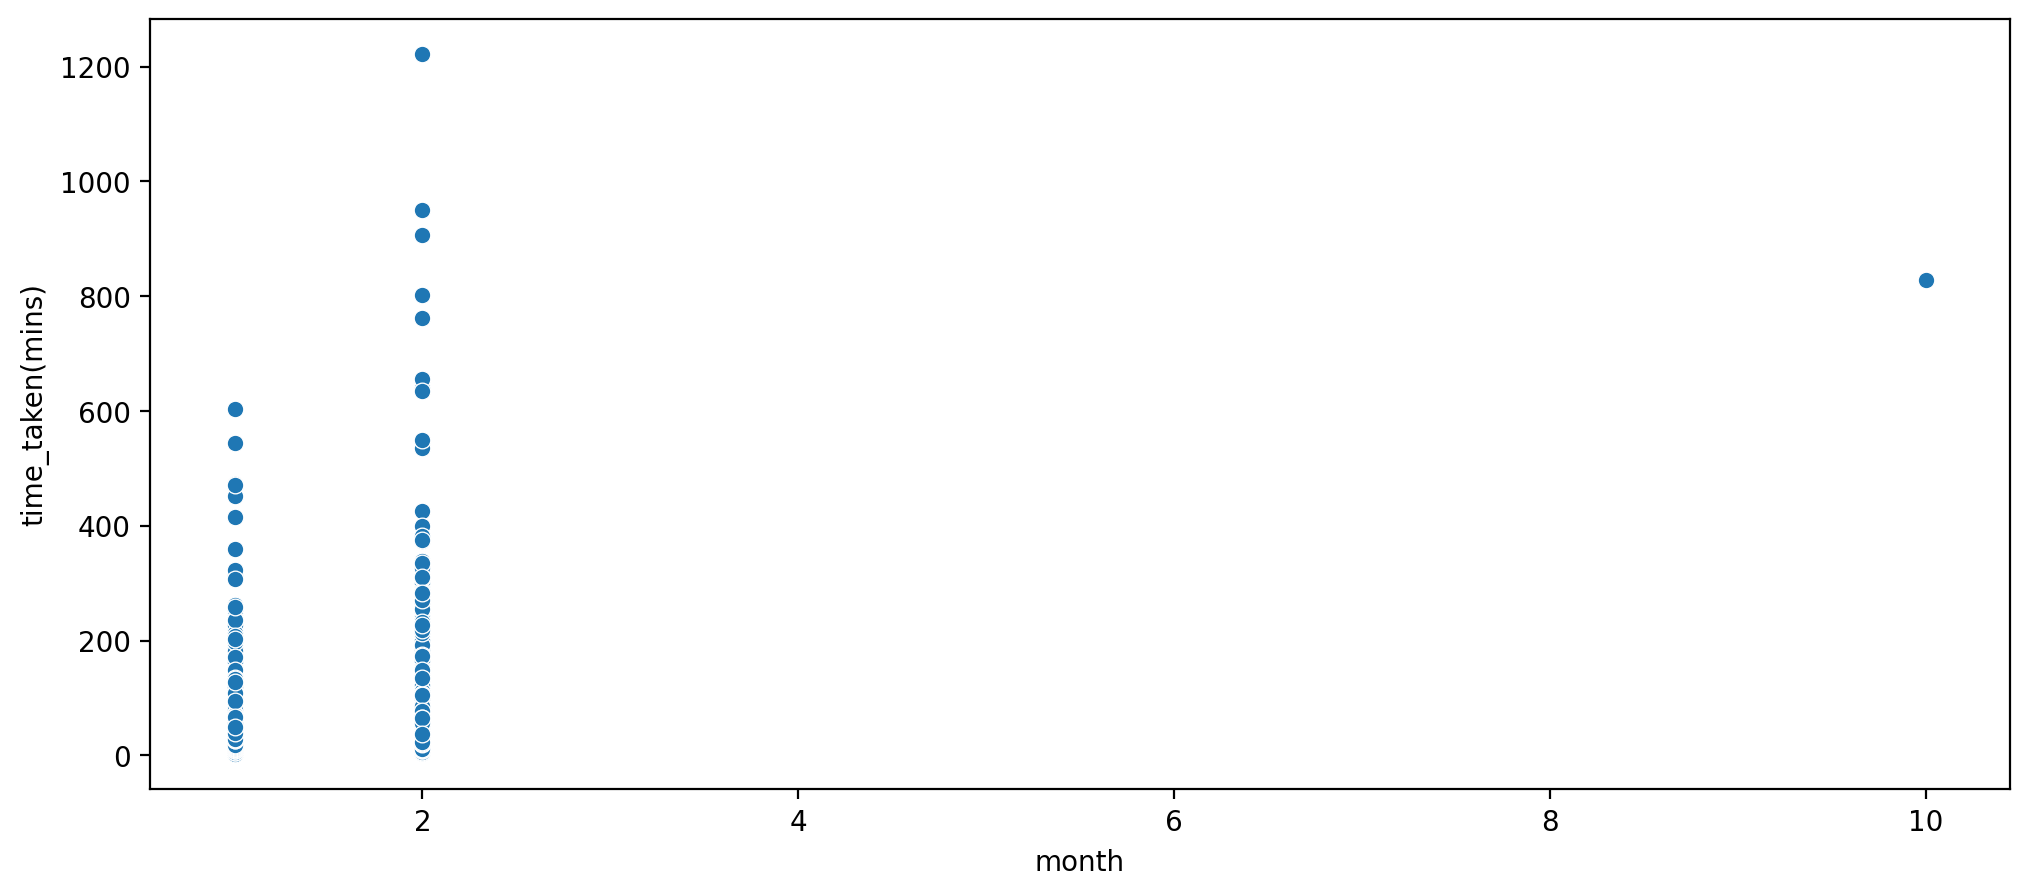

In [119]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='month', y='time_taken(mins)', data = df)

In [120]:
features.append('month')

In [121]:
features

['market_id', 'store_primary_category', 'order_protocol', 'month']

In [122]:
categorical_feature

['market_id',
 'store_id',
 'store_primary_category',
 'order_protocol',
 'year',
 'month']

In [123]:
numerical_feature

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'day',
 'time_taken(mins)']

<AxesSubplot:xlabel='total_items', ylabel='time_taken(mins)'>

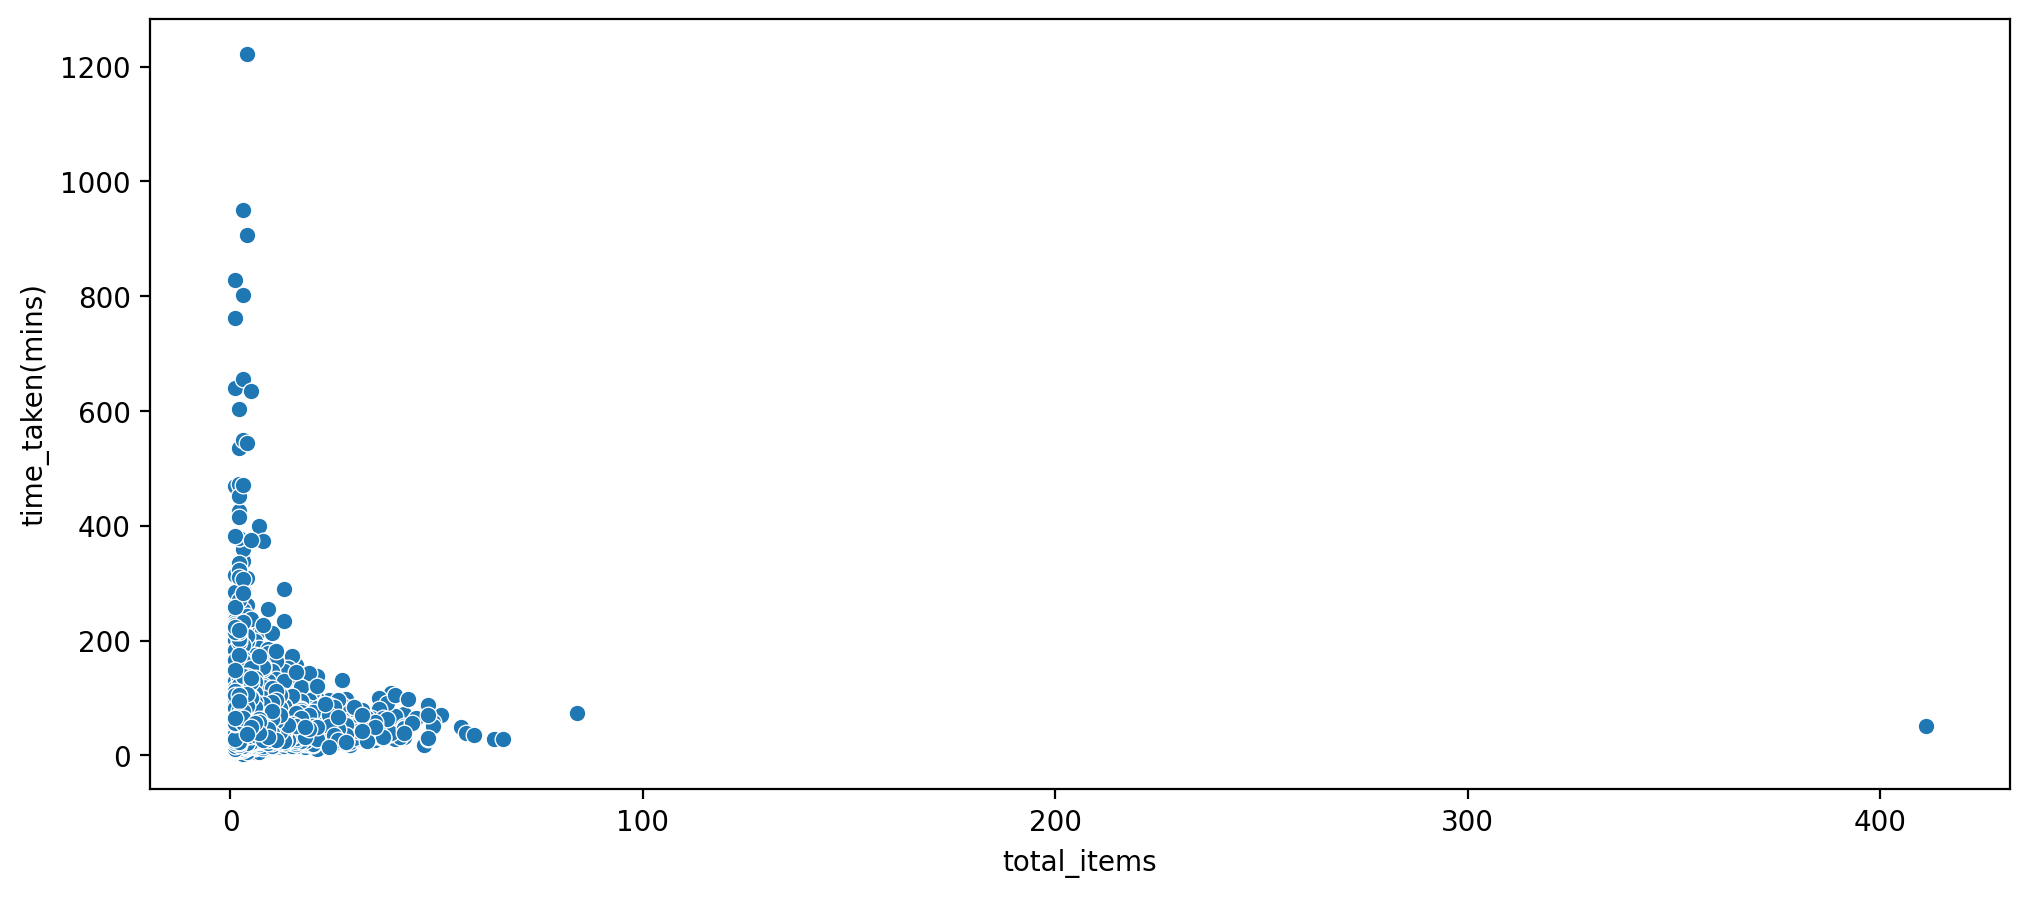

In [124]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='total_items', y='time_taken(mins)', data=df)

In [125]:
features.append('total_items')

<AxesSubplot:xlabel='subtotal', ylabel='time_taken(mins)'>

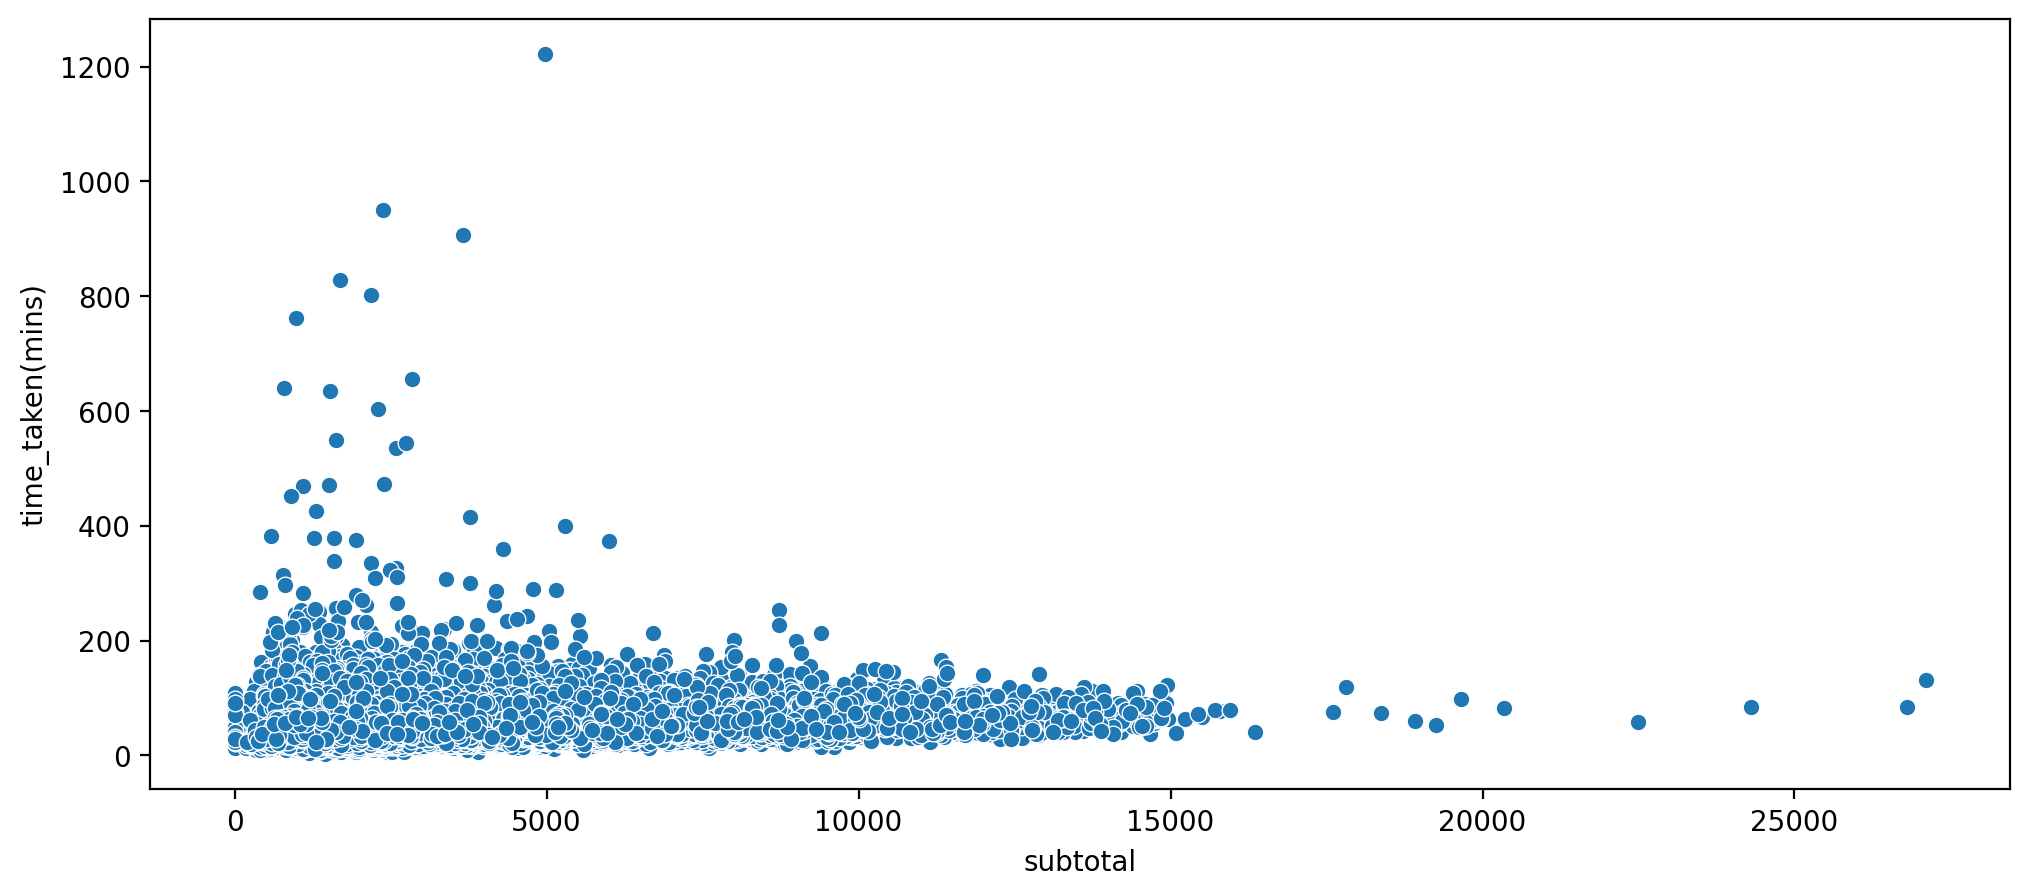

In [126]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='subtotal', y='time_taken(mins)', data=df)

In [127]:
features.append('subtotal')

<AxesSubplot:xlabel='num_distinct_items', ylabel='time_taken(mins)'>

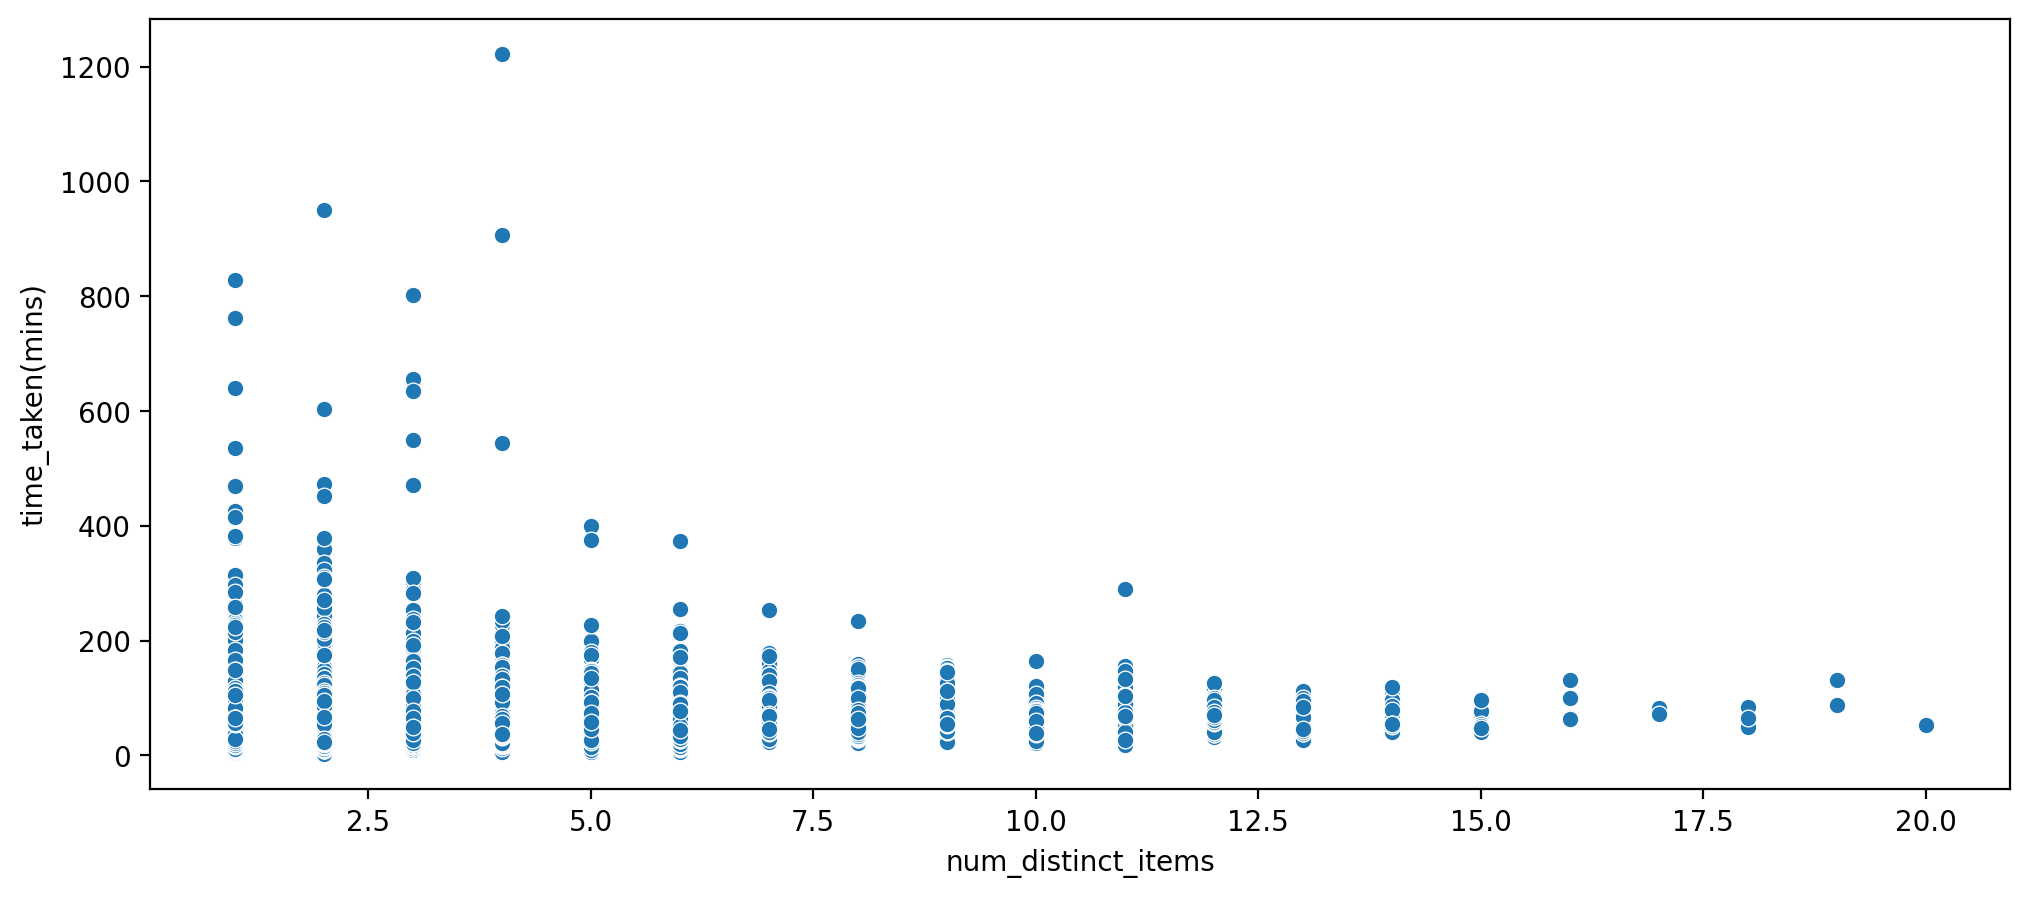

In [128]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='num_distinct_items', y='time_taken(mins)', data=df)

In [129]:
features.append('num_distinct_items')

<AxesSubplot:xlabel='min_item_price', ylabel='time_taken(mins)'>

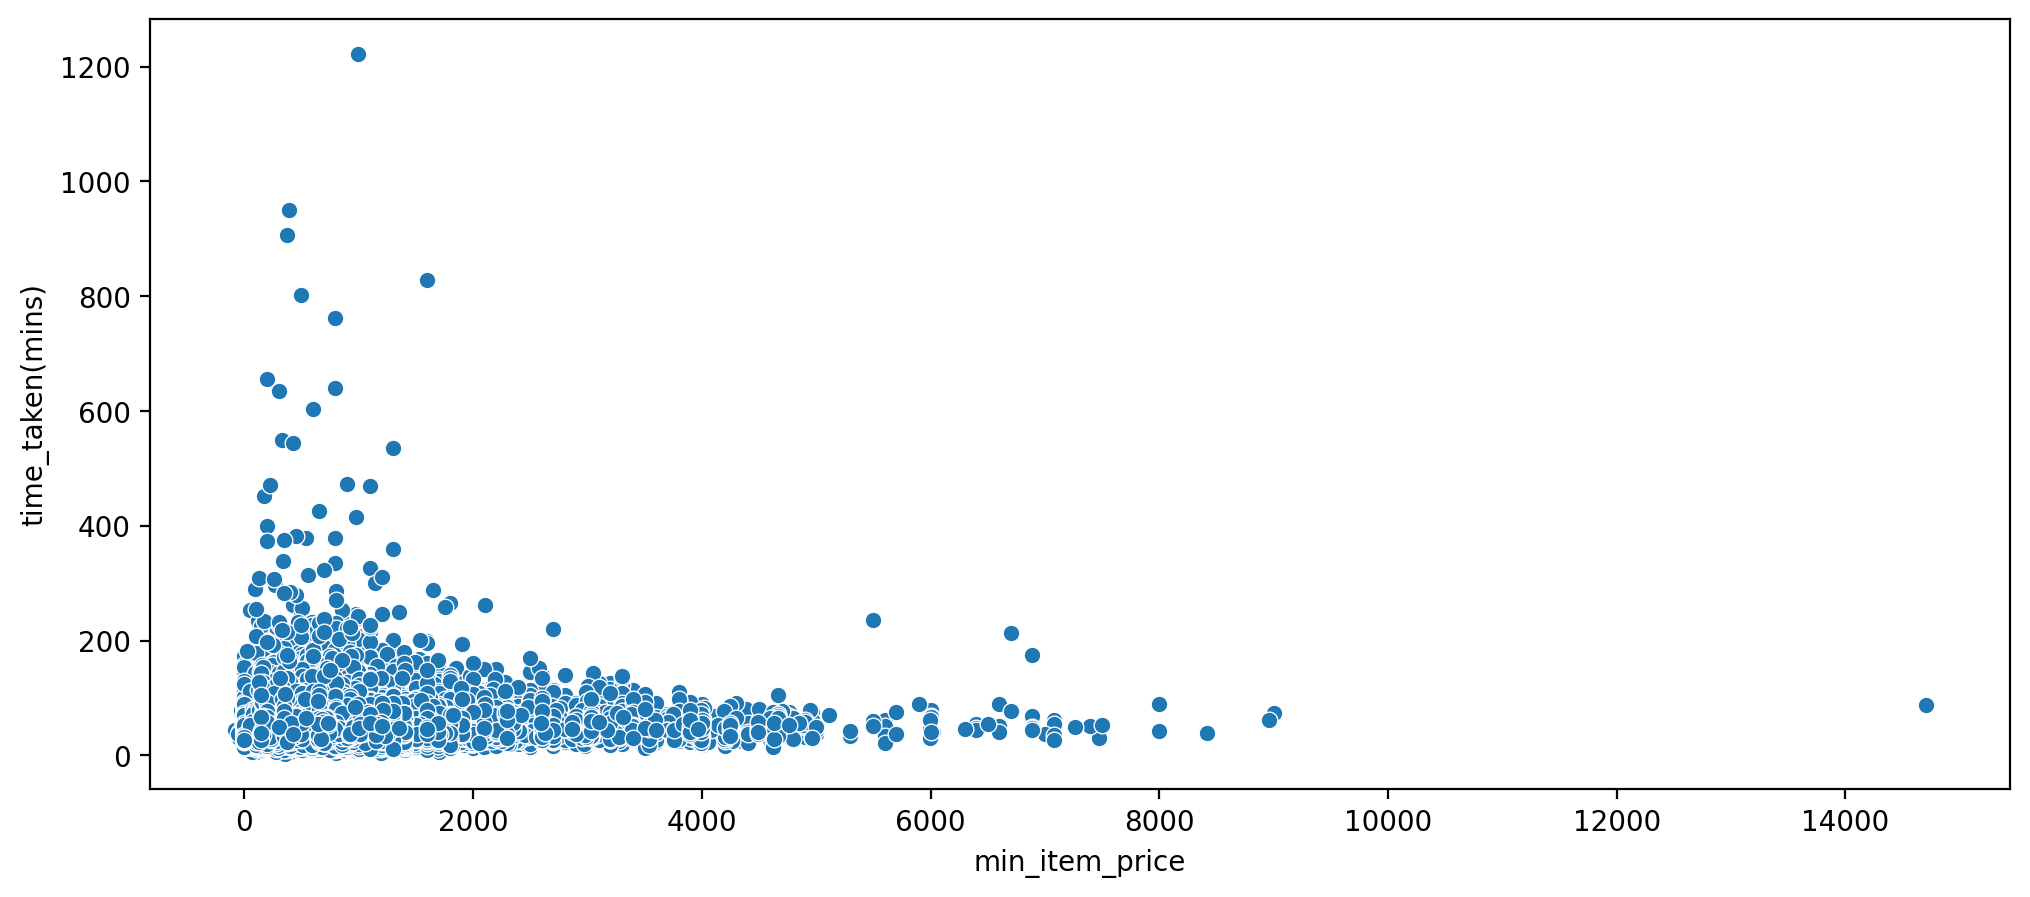

In [130]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='min_item_price', y='time_taken(mins)', data=df)

In [131]:
features.append('min_item_price')

<AxesSubplot:xlabel='max_item_price', ylabel='time_taken(mins)'>

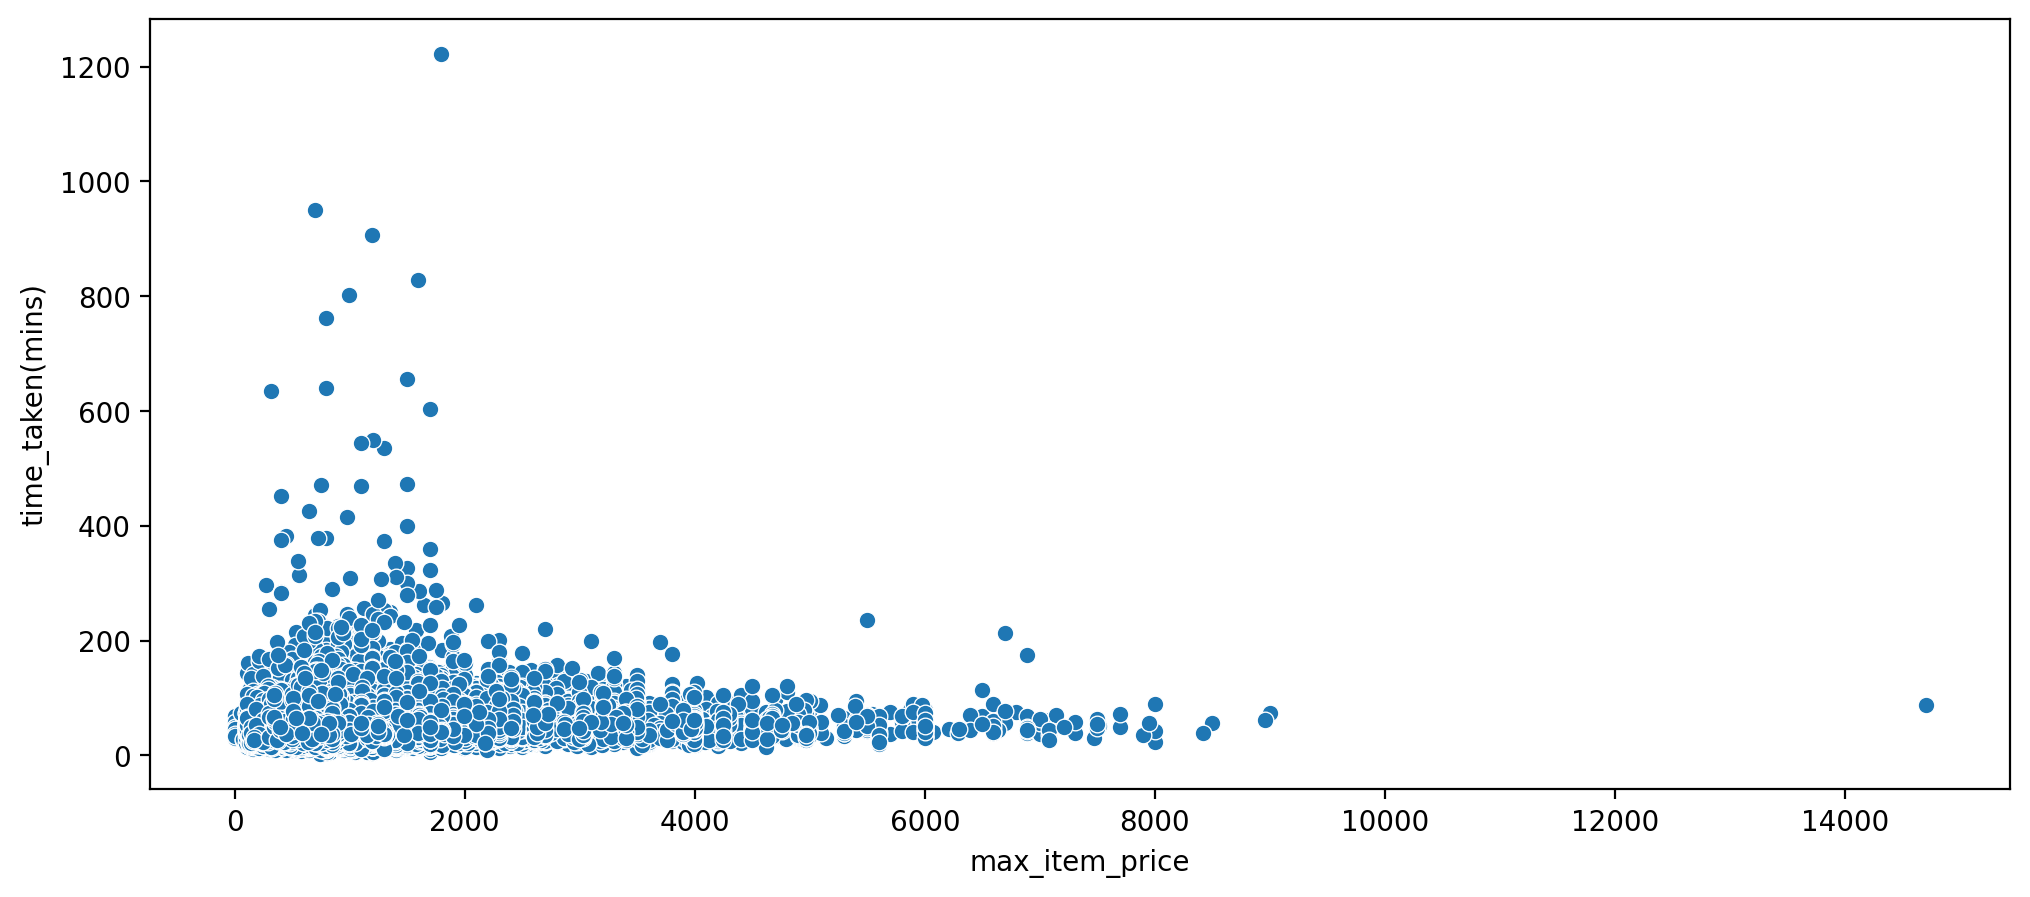

In [132]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='max_item_price', y='time_taken(mins)', data=df)

In [133]:
features.append('max_item_price')

<AxesSubplot:xlabel='total_onshift_partners', ylabel='time_taken(mins)'>

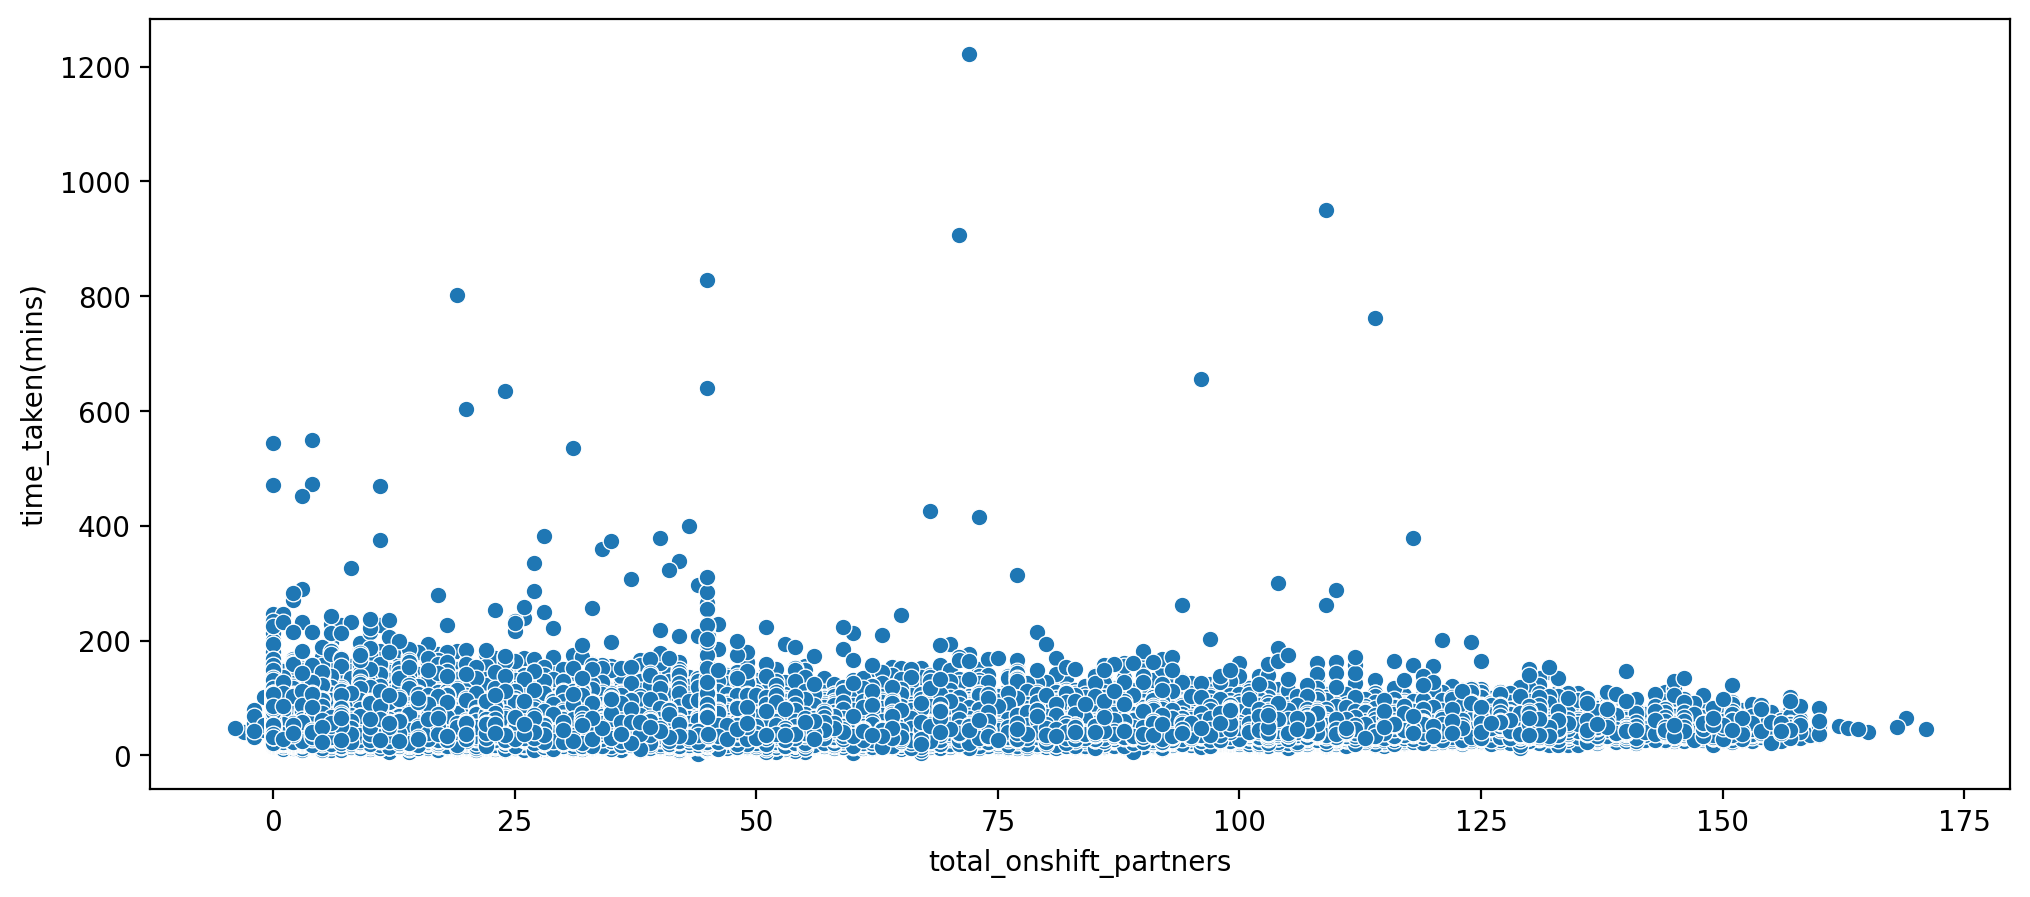

In [134]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='total_onshift_partners', y='time_taken(mins)', data=df)

In [135]:
features.append('total_onshift_partners')

In [136]:
numerical_feature

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'day',
 'time_taken(mins)']

<AxesSubplot:xlabel='total_busy_partners', ylabel='time_taken(mins)'>

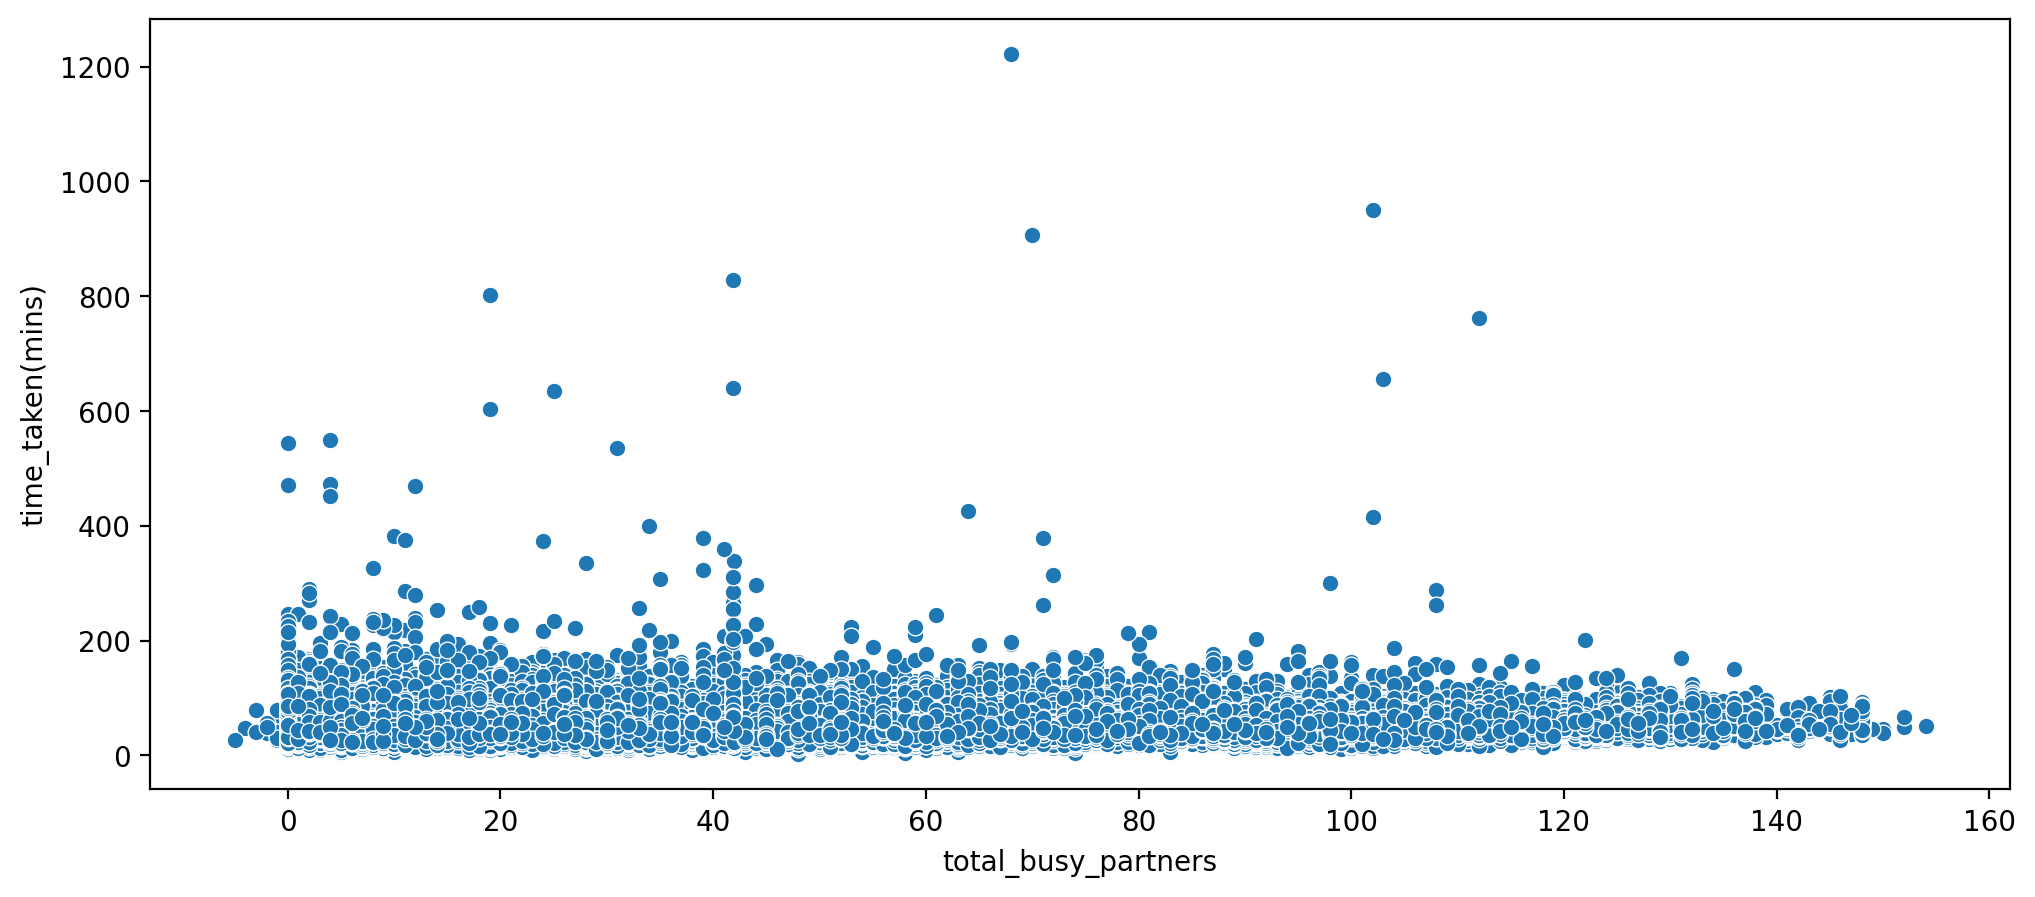

In [137]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='total_busy_partners', y='time_taken(mins)', data=df)

In [138]:
features.append('total_busy_partners')

<AxesSubplot:xlabel='total_outstanding_orders', ylabel='time_taken(mins)'>

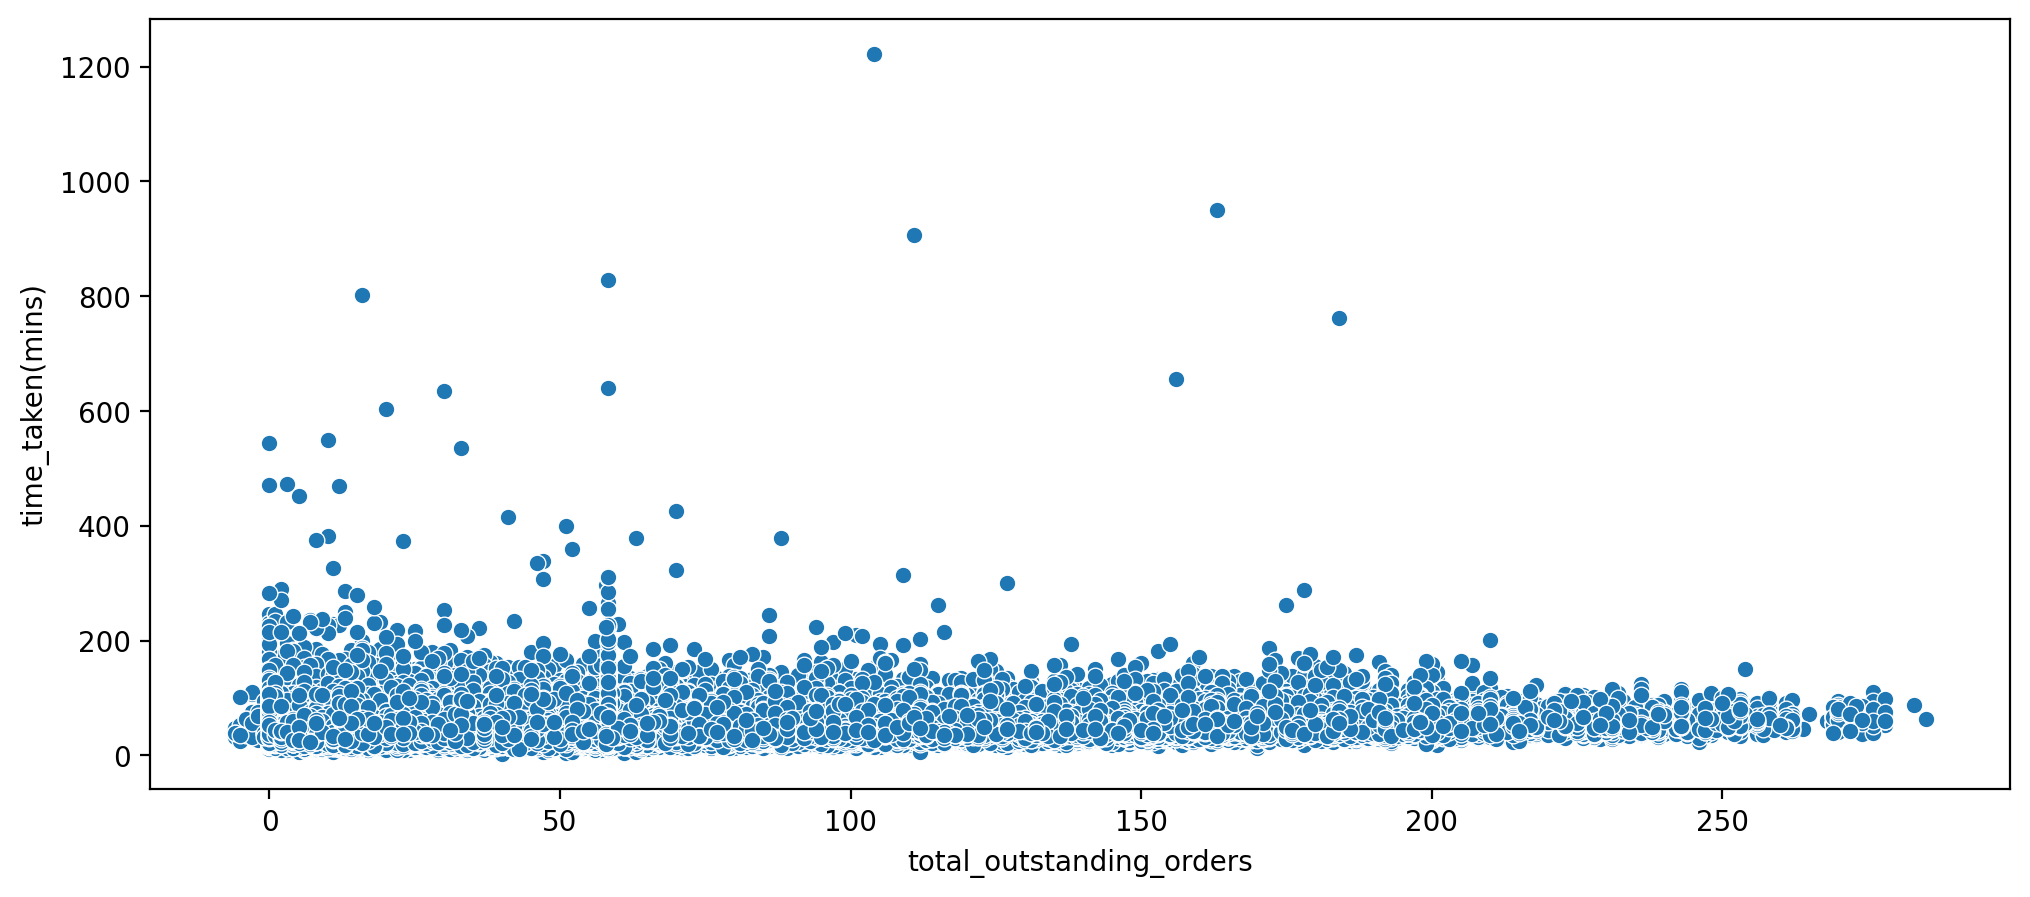

In [139]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='total_outstanding_orders', y='time_taken(mins)', data=df)

In [140]:
features.append('total_outstanding_orders')

<AxesSubplot:xlabel='day', ylabel='time_taken(mins)'>

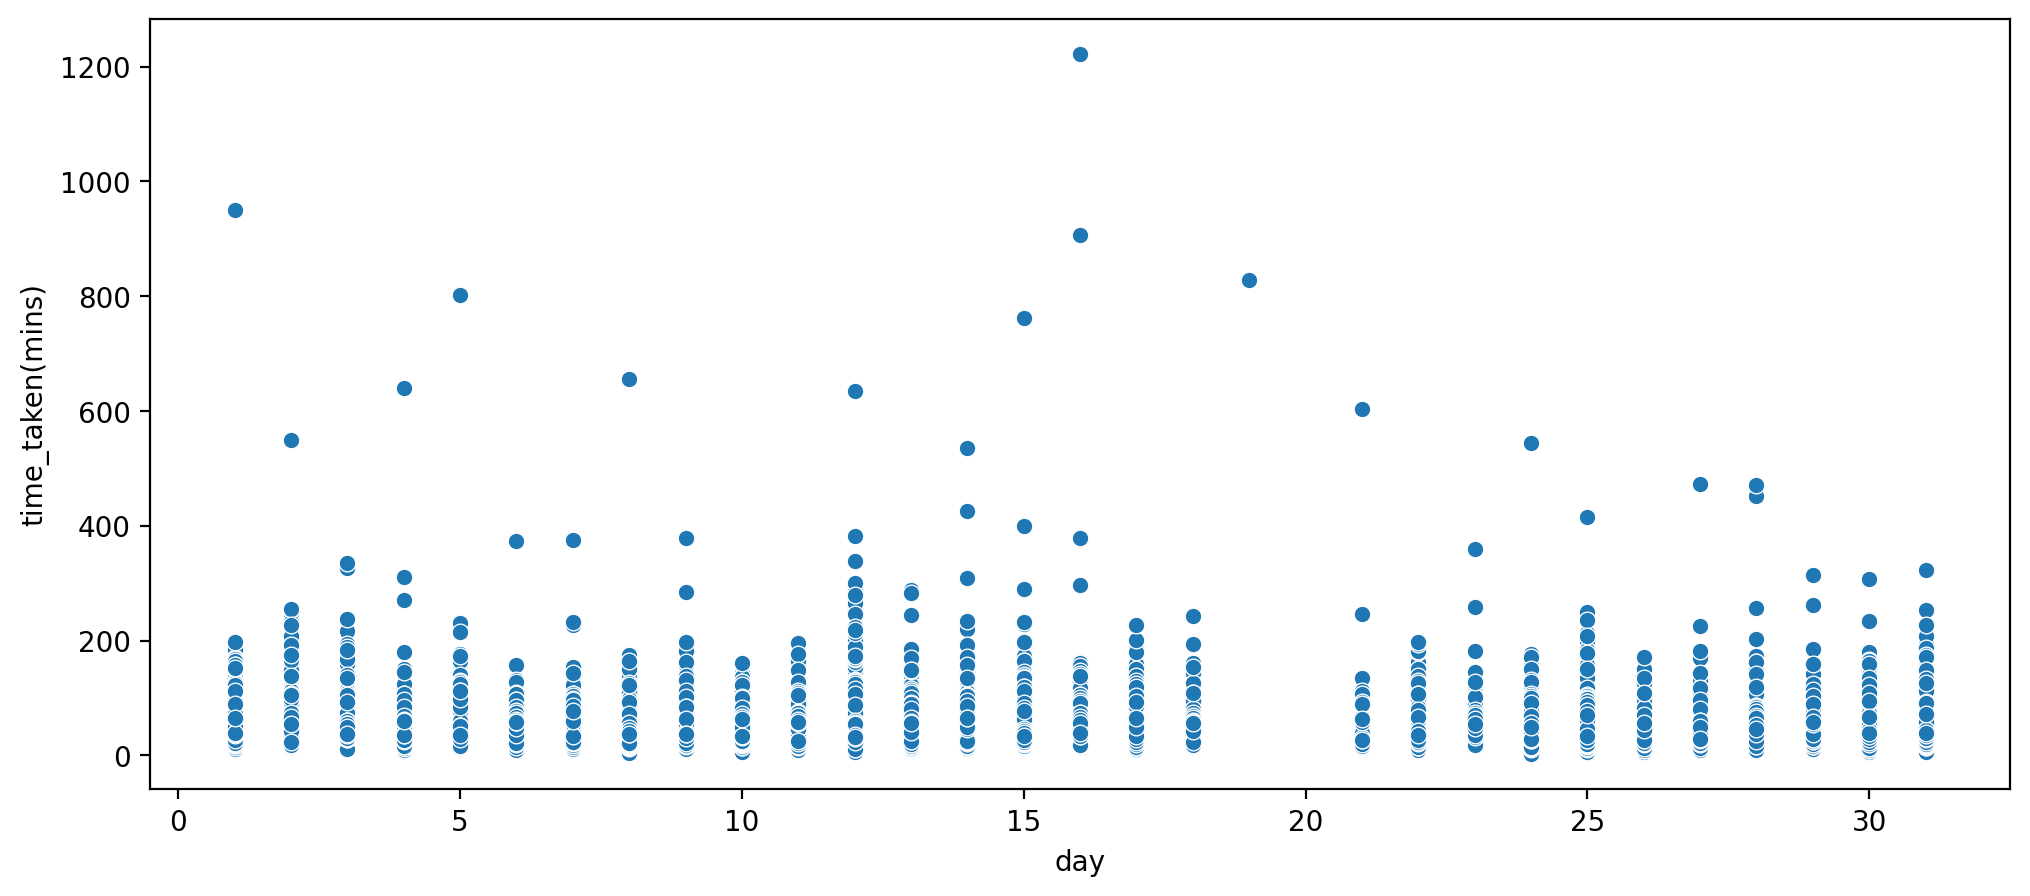

In [141]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot(x='day', y='time_taken(mins)', data=df)

In [142]:
features.append('day')

<AxesSubplot:xlabel='market_id'>

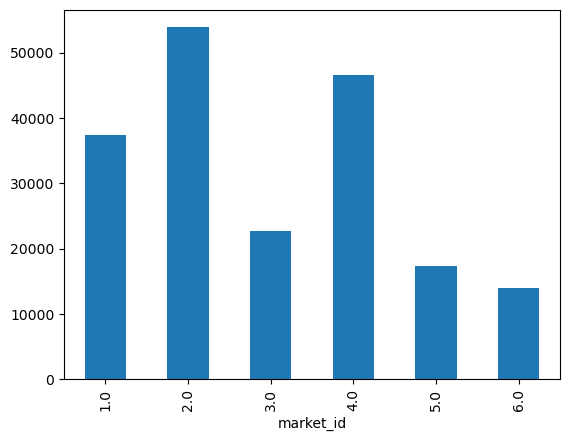

In [143]:
df.groupby('market_id')['store_id'].count().plot.bar()

<AxesSubplot:xlabel='total_onshift_partners'>

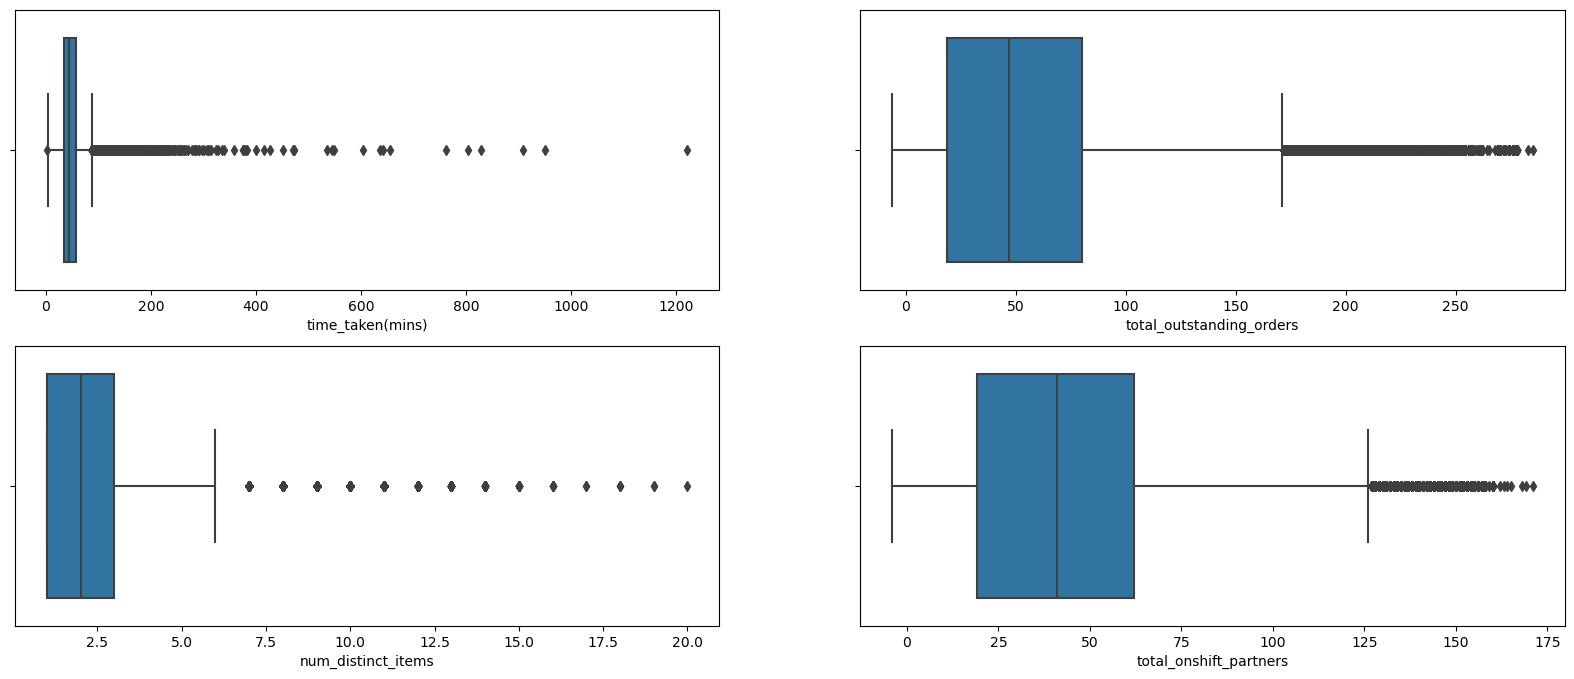

In [144]:
fig=plt.figure(figsize=(20,8))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((2,2),(0,0))
ax[1]=plt.subplot2grid((2,2),(0,1))
ax[2]=plt.subplot2grid((2,2),(1,0))
ax[3]=plt.subplot2grid((2,2),(1,1))
sns.boxplot(x='time_taken(mins)',data=df,ax=ax[0])
sns.boxplot(x='total_outstanding_orders',data=df,ax=ax[1])
sns.boxplot(x='num_distinct_items',data=df,ax=ax[2])
sns.boxplot(x='total_onshift_partners',data=df,ax=ax[3])

<AxesSubplot:>

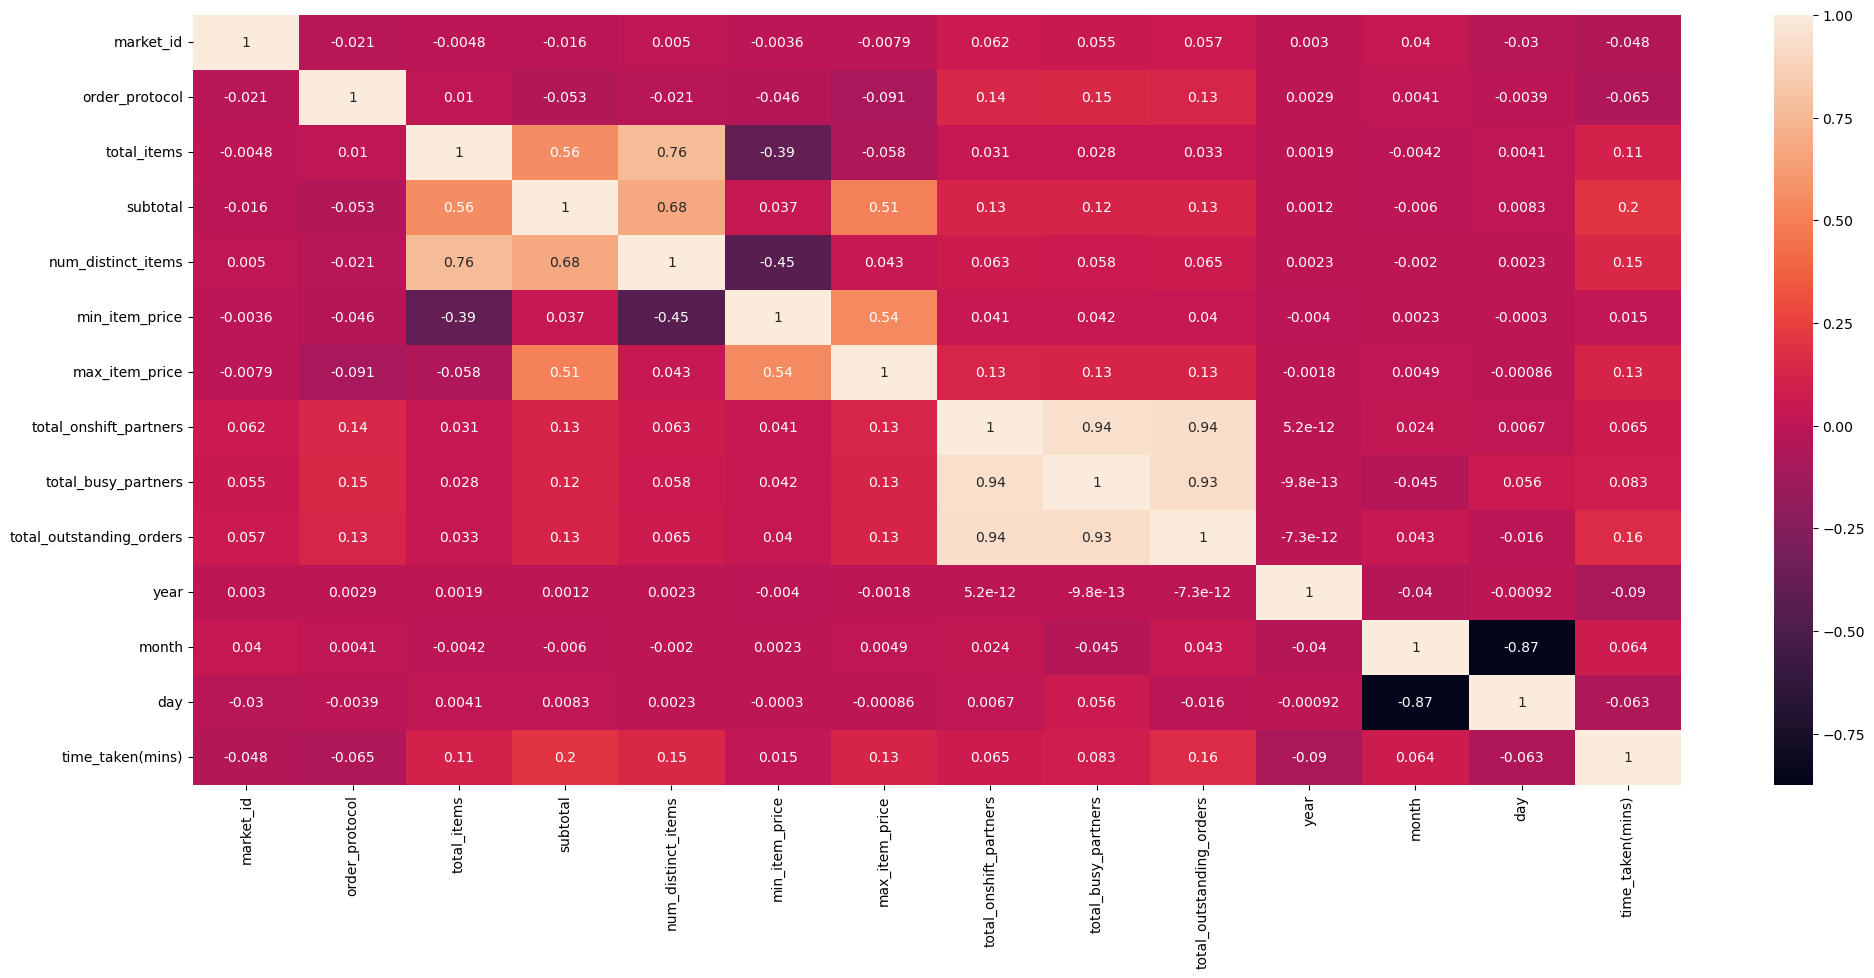

In [145]:
#correlation heatmap
plt.figure(figsize=(24,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

## Data Preprocessing and Feature Selection`

In [146]:
df.isnull().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
year                        0
month                       0
day                         0
time_taken(mins)            0
dtype: int64

In [147]:
features

['market_id',
 'store_primary_category',
 'order_protocol',
 'month',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'day']

In [148]:
features.append('time_taken(mins)')

In [149]:
features

['market_id',
 'store_primary_category',
 'order_protocol',
 'month',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'day',
 'time_taken(mins)']

In [150]:
df = df[features]

In [151]:
df.isnull().sum()

market_id                   0
store_primary_category      0
order_protocol              0
month                       0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
day                         0
time_taken(mins)            0
dtype: int64

In [152]:
df.describe()

,market_id,order_protocol,month,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,day,time_taken(mins)
count,191921.000000,191921.000000,191921.000000,191921.000000,191921.000000,191921.000000,191921.000000,191921.000000,191921.000000,191921.000000,191921.00000,191921.000000,191921.000000
mean,2.971754,2.897911,1.653279,3.193481,2679.678628,2.668139,685.705853,1158.262478,44.905276,41.845434,58.20680,15.294184,47.683671
std,1.523229,1.501560,0.476321,2.668700,1822.915527,1.628808,520.432774,557.209769,33.089462,30.813675,50.51032,9.199040,19.693647
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.00000,1.000000,1.683333
25%,2.000000,1.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,19.000000,17.000000,19.00000,7.000000,35.066667
50%,3.000000,3.000000,2.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,41.000000,39.000000,47.00000,14.000000,44.316667
75%,4.000000,4.000000,2.000000,4.000000,3393.000000,3.000000,949.000000,1395.000000,62.000000,60.000000,80.00000,24.000000,56.333333
max,6.000000,7.000000,10.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.00000,31.000000,1221.366667


In [153]:
df.drop(df[df['min_item_price']<0].index,axis=0,inplace=True)
df.drop(df[df['total_outstanding_orders']<0].index,axis=0,inplace=True)
df.drop(df[df['total_onshift_partners']<0].index,axis=0,inplace=True)
df.drop(df[df['total_busy_partners']<0].index,axis=0,inplace=True)

/var/folders/bq/_63515l56bbcxdr7gvzr_m740000gn/T/ipykernel_6733/561559068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['min_item_price']<0].index,axis=0,inplace=True)
/var/folders/bq/_63515l56bbcxdr7gvzr_m740000gn/T/ipykernel_6733/561559068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['total_outstanding_orders']<0].index,axis=0,inplace=True)
/var/folders/bq/_63515l56bbcxdr7gvzr_m740000gn/T/ipykernel_6733/561559068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [154]:
df.describe()

,market_id,order_protocol,month,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,day,time_taken(mins)
count,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000
mean,2.972178,2.897992,1.653295,3.192880,2679.742307,2.668105,685.724630,1158.303750,44.922386,41.861510,58.231133,15.294106,47.682171
std,1.523222,1.501513,0.476316,2.666328,1823.034994,1.628727,520.359274,557.178075,33.086879,30.811174,50.508994,9.199088,19.693828
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.683333
25%,2.000000,1.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,19.000000,17.000000,19.000000,7.000000,35.066667
50%,3.000000,3.000000,2.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,41.000000,39.000000,47.000000,14.000000,44.316667
75%,4.000000,4.000000,2.000000,4.000000,3393.000000,3.000000,949.000000,1395.000000,62.000000,60.000000,80.000000,24.000000,56.333333
max,6.000000,7.000000,10.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,31.000000,1221.366667


In [155]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'month',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'day', 'time_taken(mins)'],
      dtype='object')

In [156]:
categorical = ['market_id', 'store_primary_category', 'order_protocol', 'month','day']
numerical = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders']

In [157]:
df_num=df[numerical]
df_cat=df[categorical]

In [158]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df_cat[categorical] = encoder.fit_transform(df_cat[categorical])

/var/folders/bq/_63515l56bbcxdr7gvzr_m740000gn/T/ipykernel_6733/3094570732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[categorical] = encoder.fit_transform(df_cat[categorical])


In [159]:
df_cat.head()

,market_id,store_primary_category,order_protocol,month,day
0,0.0,4.0,0.0,1.0,5.0
1,1.0,47.0,1.0,1.0,9.0
8,1.0,36.0,2.0,1.0,15.0
14,0.0,39.0,0.0,1.0,11.0
15,0.0,39.0,0.0,0.0,25.0


In [160]:
df_num.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000
mean,3.192880,2679.742307,2.668105,685.724630,1158.303750,44.922386,41.861510,58.231133
std,2.666328,1823.034994,1.628727,520.359274,557.178075,33.086879,30.811174,50.508994
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,799.000000,19.000000,17.000000,19.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,41.000000,39.000000,47.000000
75%,4.000000,3393.000000,3.000000,949.000000,1395.000000,62.000000,60.000000,80.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_num[numerical] = scaler.fit_transform(df_num[numerical])

/var/folders/bq/_63515l56bbcxdr7gvzr_m740000gn/T/ipykernel_6733/2386763508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[numerical] = scaler.fit_transform(df_num[numerical])


In [162]:
df_num.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,0.302709,0.417578,0.817754,-0.247377,0.144831,-0.360337,-0.904269,-0.737121
1,-0.822437,-0.427718,-1.024180,1.372662,0.433787,-1.327490,-1.293739,-1.113292
8,0.302709,1.147133,0.203776,0.258044,0.799919,-1.115925,-1.163916,-0.796516
14,-0.822437,-0.633419,-1.024180,1.612881,0.658133,-1.206596,-1.163916,-0.994501
15,-0.447388,0.515766,-0.410202,1.420706,1.860624,-1.206596,-1.196371,-1.014300


In [163]:
df_new=pd.concat((df_num,df_cat),axis=1)

In [164]:
df_new.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,market_id,store_primary_category,order_protocol,month,day
0,0.302709,0.417578,0.817754,-0.247377,0.144831,-0.360337,-0.904269,-0.737121,0.0,4.0,0.0,1.0,5.0
1,-0.822437,-0.427718,-1.024180,1.372662,0.433787,-1.327490,-1.293739,-1.113292,1.0,47.0,1.0,1.0,9.0
8,0.302709,1.147133,0.203776,0.258044,0.799919,-1.115925,-1.163916,-0.796516,1.0,36.0,2.0,1.0,15.0
14,-0.822437,-0.633419,-1.024180,1.612881,0.658133,-1.206596,-1.163916,-0.994501,0.0,39.0,0.0,1.0,11.0
15,-0.447388,0.515766,-0.410202,1.420706,1.860624,-1.206596,-1.196371,-1.014300,0.0,39.0,0.0,0.0,25.0


In [182]:
df_new.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,market_id,store_primary_category,order_protocol,month,day
count,1.918290e+05,1.918290e+05,1.918290e+05,1.918290e+05,1.918290e+05,1.918290e+05,1.918290e+05,1.918290e+05,191829.000000,191829.000000,191829.000000,191829.000000,191829.000000
mean,-3.920751e-15,-2.506532e-16,-6.201961e-15,5.434565e-16,-1.077314e-15,7.708870e-16,4.617615e-16,-1.063092e-15,1.972178,36.554562,1.897992,0.653259,13.947359
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.523222,21.132602,1.501513,0.475945,8.785386
min,-8.224367e-01,-1.469938e+00,-1.024180e+00,-1.317794e+00,-2.078881e+00,-1.357714e+00,-1.358651e+00,-1.152889e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.473881e-01,-7.019863e-01,-1.024180e+00,-7.431897e-01,-6.448651e-01,-7.834663e-01,-8.069013e-01,-7.767178e-01,1.000000,18.000000,0.000000,0.000000,6.000000
50%,-7.233943e-02,-2.631565e-01,-4.102020e-01,-1.743504e-01,-1.136152e-01,-1.185484e-01,-9.287272e-02,-2.223596e-01,2.000000,39.000000,2.000000,1.000000,13.000000
75%,3.027092e-01,3.912484e-01,2.037759e-01,5.059505e-01,4.248137e-01,5.161459e-01,5.887000e-01,4.309910e-01,3.000000,56.000000,3.000000,1.000000,22.000000
max,1.529475e+02,1.339542e+01,1.064140e+01,2.693199e+01,2.430414e+01,3.810512e+00,3.639549e+00,4.489685e+00,5.000000,73.000000,6.000000,2.000000,29.000000


In [183]:
df_new['num_distinct_items'].describe()

count    1.918290e+05
mean    -6.201961e-15
std      1.000003e+00
min     -1.024180e+00
25%     -1.024180e+00
50%     -4.102020e-01
75%      2.037759e-01
max      1.064140e+01
Name: num_distinct_items, dtype: float64

In [186]:
df_new.drop(df_new[df_new['num_distinct_items']<0].index,axis=0,inplace=True)

In [187]:
df_new['num_distinct_items'].describe()

count    85793.000000
mean         0.854409
std          0.894229
min          0.203776
25%          0.203776
50%          0.817754
75%          1.431732
max         10.641400
Name: num_distinct_items, dtype: float64

In [190]:
X = df_new
y = df['time_taken(mins)']

In [191]:
X.isnull().sum()

total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
market_id                   0
store_primary_category      0
order_protocol              0
month                       0
day                         0
dtype: int64

In [192]:
X.fillna(method='ffill', inplace=True)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Training

### Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [195]:
mlr_model.score(X_train, y_train),mlr_model.score(X_test, y_test)

(0.14351797684350864, 0.14647389753569873)

### Decision Tree Regression

In [196]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(max_depth=6)
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [197]:
decision_regressor.score(X_train, y_train),decision_regressor.score(X_test, y_test)

(0.13657403820281944, 0.10881238645140578)

### Random Forest Regression

In [211]:
from sklearn.ensemble import RandomForestRegressor
randomForest_regressor = RandomForestRegressor(n_estimators=100,max_depth=6)
randomForest_regressor.fit(X_train,y_train)

print ('Training Set Score print',randomForest_regressor.score(X_train, y_train)) 
print ('Test Set Score print',randomForest_regressor.score(X_test, y_test)) 

Training Set Score print 0.1831300197634469
Test Set Score print 0.12845097088054225


### XGBoost Regression

In [228]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=250, max_depth=5)
xgb_regressor.fit(X_train,y_train)

print ('Training Set Score print',xgb_regressor.score(X_train, y_train)) 
print ('Test Set Score print',xgb_regressor.score(X_test, y_test)) 

Training Set Score print 0.5017873341732677
Test Set Score print 0.202197221113811
